In [64]:
!pip install pandas-datareader


[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [65]:
!pip install setuptools


[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [66]:
!pip install --upgrade pandas_datareader


[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [67]:
!pip install yfinance


[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [68]:
import os
import numpy as np
import pandas as pd
from matplotlib import pyplot
import matplotlib.pyplot as plt
# Remove these problematic lines:
# import pandas_datareader as web
# from pandas_datareader import data, wb

# Replace with:
import yfinance as yf

import scipy.optimize as sco
from scipy import stats
import math
import seaborn as sns
import datetime as dt
from datetime import datetime

import warnings
warnings.filterwarnings("ignore")

import seaborn as sns
from pylab import rcParams
sns.set(style='whitegrid', palette='muted', font_scale=1.2)
HAPPY_COLORS_PALETTE = ["#01BEFE", "#FFDD00", "#FF7D00", "#FF006D","#93D30C","#8F00FF"]
sns.set_palette(sns.color_palette(HAPPY_COLORS_PALETTE))
rcParams['figure.figsize'] = 18, 10
RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)

In [69]:
!pip install yahoofinancials



[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [70]:
from yahoofinancials import YahooFinancials

In [71]:
GOOG = yf.download("GOOG", start="2012-05-18", end="2026-01-12",group_by="ticker") 
AAPL = yf.download("AAPL", start="2012-05-18", end="2026-01-12",group_by="ticker") 
META = yf.download("META", start="2012-05-18", end="2026-01-12",group_by="ticker") 
AMZN = yf.download("AMZN", start="2012-05-18", end="2026-01-12",group_by="ticker") 
MSFT = yf.download("MSFT", start="2012-05-18", end="2026-01-12",group_by="ticker") 
GSPC = yf.download("^GSPC", start="2012-05-18", end="2026-01-12",group_by="ticker") 
print(GOOG.shape, AAPL.shape, META.shape, AMZN.shape,MSFT.shape,GSPC.shape)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

(3431, 5) (3431, 5) (3431, 5) (3431, 5) (3431, 5) (3431, 5)


In [72]:
GOOG

Ticker            GOOG                                               
Price             Open        High         Low       Close     Volume
Date                                                                 
2012-05-18   15.453241   15.634201   14.751158   14.842627  239835606
2012-05-21   14.845346   15.220614   14.832737   15.181554  123477094
2012-05-22   15.164993   15.174139   14.733854   14.852516  122533571
2012-05-23   14.873528   15.070062   14.761541   15.066601  127600492
2012-05-24   15.059185   15.127416   14.804804   14.923219   75935562
...                ...         ...         ...         ...        ...
2026-01-05  317.695007  319.250000  315.248993  317.320007   19934000
2026-01-06  317.309998  321.559998  312.339996  314.549988   18989900
2026-01-07  314.570007  326.464996  314.500000  322.429993   24681800
2026-01-08  329.265015  330.540009  321.989990  326.010010   21789600
2026-01-09  327.489990  331.480011  326.250000  329.140015   17917700

[3431 rows x 5 columns]

In [73]:
AAPL

Ticker            AAPL                                               
Price             Open        High         Low       Close     Volume
Date                                                                 
2012-05-18   16.014017   16.297432   15.660723   15.906649  732292400
2012-05-21   16.030212   16.841169   16.016714   16.833370  631106000
2012-05-22   17.081401   17.211263   16.572454   16.704115  694870400
2012-05-23   16.720004   17.178868   16.591944   17.111689  584897600
2012-05-24   17.270944   17.289839   16.831874   16.954538  496230000
...                ...         ...         ...         ...        ...
2026-01-05  270.640015  271.510010  266.140015  267.260010   45647200
2026-01-06  267.000000  267.549988  262.119995  262.359985   52352100
2026-01-07  263.200012  263.679993  259.809998  260.329987   48309800
2026-01-08  257.019989  259.290009  255.699997  259.040009   50419300
2026-01-09  259.079987  260.209991  256.220001  259.369995   39997000

[3431 rows x 5 columns]

In [74]:
META

Ticker            META                                               
Price             Open        High         Low       Close     Volume
Date                                                                 
2012-05-18   41.758303   44.687839   37.736398   37.964802  573576400
2012-05-21   36.276591   36.405691   32.771080   33.793934  168192700
2012-05-22   32.383792   33.356994   30.725377   30.784960  101786600
2012-05-23   31.152394   32.274554   31.142463   31.778023   73600000
2012-05-24   32.721434   32.979628   31.549619   32.800877   50237200
...                ...         ...         ...         ...        ...
2026-01-05  651.010010  664.539978  647.750000  658.789978   12213700
2026-01-06  659.570007  665.520020  651.900024  660.619995   11074400
2026-01-07  655.640015  659.150024  644.809998  648.690002   12846300
2026-01-08  645.880005  647.099976  635.719971  646.059998   11921700
2026-01-09  645.440002  654.950012  642.849976  653.059998   11634900

[3431 rows x 5 columns]

In [75]:
AMZN

Ticker            AMZN                                               
Price             Open        High         Low       Close     Volume
Date                                                                 
2012-05-18   10.970500   10.981500   10.640500   10.692500  104634000
2012-05-21   10.701500   10.999000   10.641000   10.905500   71596000
2012-05-22   10.915500   10.943500   10.698000   10.766500   74662000
2012-05-23   10.735500   10.877500   10.559000   10.864000   84876000
2012-05-24   10.849000   10.883000   10.635000   10.762000   62822000
...                ...         ...         ...         ...        ...
2026-01-05  228.839996  234.000000  227.179993  233.059998   49733300
2026-01-06  232.100006  243.179993  232.070007  240.929993   53764700
2026-01-07  239.610001  245.289993  239.520004  241.559998   42236500
2026-01-08  243.059998  246.410004  241.880005  246.289993   39509800
2026-01-09  244.570007  247.860001  242.240005  247.380005   34560000

[3431 rows x 5 columns]

In [76]:
MSFT

Ticker            MSFT                                              
Price             Open        High         Low       Close    Volume
Date                                                                
2012-05-18   23.638301   23.654169   23.146331   23.225681  56205300
2012-05-21   23.090790   23.638304   23.059050   23.606564  38787900
2012-05-22   23.558950   23.709713   23.408185   23.614494  39504900
2012-05-23   23.289158   23.328832   22.725774   23.098719  65171000
2012-05-24   23.138391   23.249481   22.820993   23.066977  52575000
...                ...         ...         ...         ...       ...
2026-01-05  474.059998  476.070007  469.500000  472.850006  25250300
2026-01-06  473.799988  478.739990  469.750000  478.510010  23037700
2026-01-07  479.760010  489.700012  477.950012  483.470001  25564200
2026-01-08  481.239990  482.660004  475.859985  478.109985  18162600
2026-01-09  474.059998  479.820007  472.200012  479.279999  18491000

[3431 rows x 5 columns]

In [77]:
GSPC

Ticker            ^GSPC                                                   
Price              Open         High          Low        Close      Volume
Date                                                                      
2012-05-18  1305.050049  1312.239990  1291.979980  1295.219971  4512470000
2012-05-21  1295.729980  1316.390015  1295.729980  1315.989990  3786750000
2012-05-22  1316.089966  1328.489990  1310.040039  1316.630005  4123680000
2012-05-23  1316.020020  1320.709961  1296.530029  1318.859985  4108330000
2012-05-24  1318.719971  1324.140015  1310.500000  1320.680054  3937670000
...                 ...          ...          ...          ...         ...
2026-01-05  6892.189941  6920.379883  6891.560059  6902.049805  5771930000
2026-01-06  6908.029785  6948.689941  6904.020020  6944.819824  5509680000
2026-01-07  6945.069824  6965.689941  6919.189941  6920.930176  5214480000
2026-01-08  6914.109863  6931.279785  6899.330078  6921.459961  5333200000
2026-01-09  6927.830078  6978.359863  6917.640137  6966.279785  5163900000

[3431 rows x 5 columns]

In [78]:
GOOG.isnull().sum()

Ticker  Price 
GOOG    Open      0
        High      0
        Low       0
        Close     0
        Volume    0
dtype: int64

In [79]:
AAPL.isnull().sum()

Ticker  Price 
AAPL    Open      0
        High      0
        Low       0
        Close     0
        Volume    0
dtype: int64

In [80]:
META.isnull().sum()

Ticker  Price 
META    Open      0
        High      0
        Low       0
        Close     0
        Volume    0
dtype: int64

In [81]:
AMZN.isnull().sum()

Ticker  Price 
AMZN    Open      0
        High      0
        Low       0
        Close     0
        Volume    0
dtype: int64

In [82]:
MSFT.isnull().sum()

Ticker  Price 
MSFT    Open      0
        High      0
        Low       0
        Close     0
        Volume    0
dtype: int64

In [83]:
GSPC.isnull().sum()

Ticker  Price 
^GSPC   Open      0
        High      0
        Low       0
        Close     0
        Volume    0
dtype: int64

In [84]:
print(GOOG.head())


Ticker           GOOG                                            
Price            Open       High        Low      Close     Volume
Date                                                             
2012-05-18  15.453241  15.634201  14.751158  14.842627  239835606
2012-05-21  14.845346  15.220614  14.832737  15.181554  123477094
2012-05-22  15.164993  15.174139  14.733854  14.852516  122533571
2012-05-23  14.873528  15.070062  14.761541  15.066601  127600492
2012-05-24  15.059185  15.127416  14.804804  14.923219   75935562


In [85]:
# If the above doesn't work, try accessing the 'Close' level directly
dataset = pd.DataFrame({
    'GOOG': GOOG.xs('Close', level='Price', axis=1).squeeze(),
    'AAPL': AAPL.xs('Close', level='Price', axis=1).squeeze(),
    'META': META.xs('Close', level='Price', axis=1).squeeze(),
    'AMZN': AMZN.xs('Close', level='Price', axis=1).squeeze(),
    'MSFT': MSFT.xs('Close', level='Price', axis=1).squeeze(),
    'GSPC': GSPC.xs('Close', level='Price', axis=1).squeeze()
})

dataset.head()

GOOG       AAPL       META     AMZN       MSFT         GSPC
Date                                                                        
2012-05-18  14.842627  15.906649  37.964802  10.6925  23.225681  1295.219971
2012-05-21  15.181554  16.833370  33.793934  10.9055  23.606564  1315.989990
2012-05-22  14.852516  16.704115  30.784960  10.7665  23.614494  1316.630005
2012-05-23  15.066601  17.111689  31.778023  10.8640  23.098719  1318.859985
2012-05-24  14.923219  16.954538  32.800877  10.7620  23.066977  1320.680054

In [86]:
print('Shape of data',dataset.shape)


Shape of data (3431, 6)


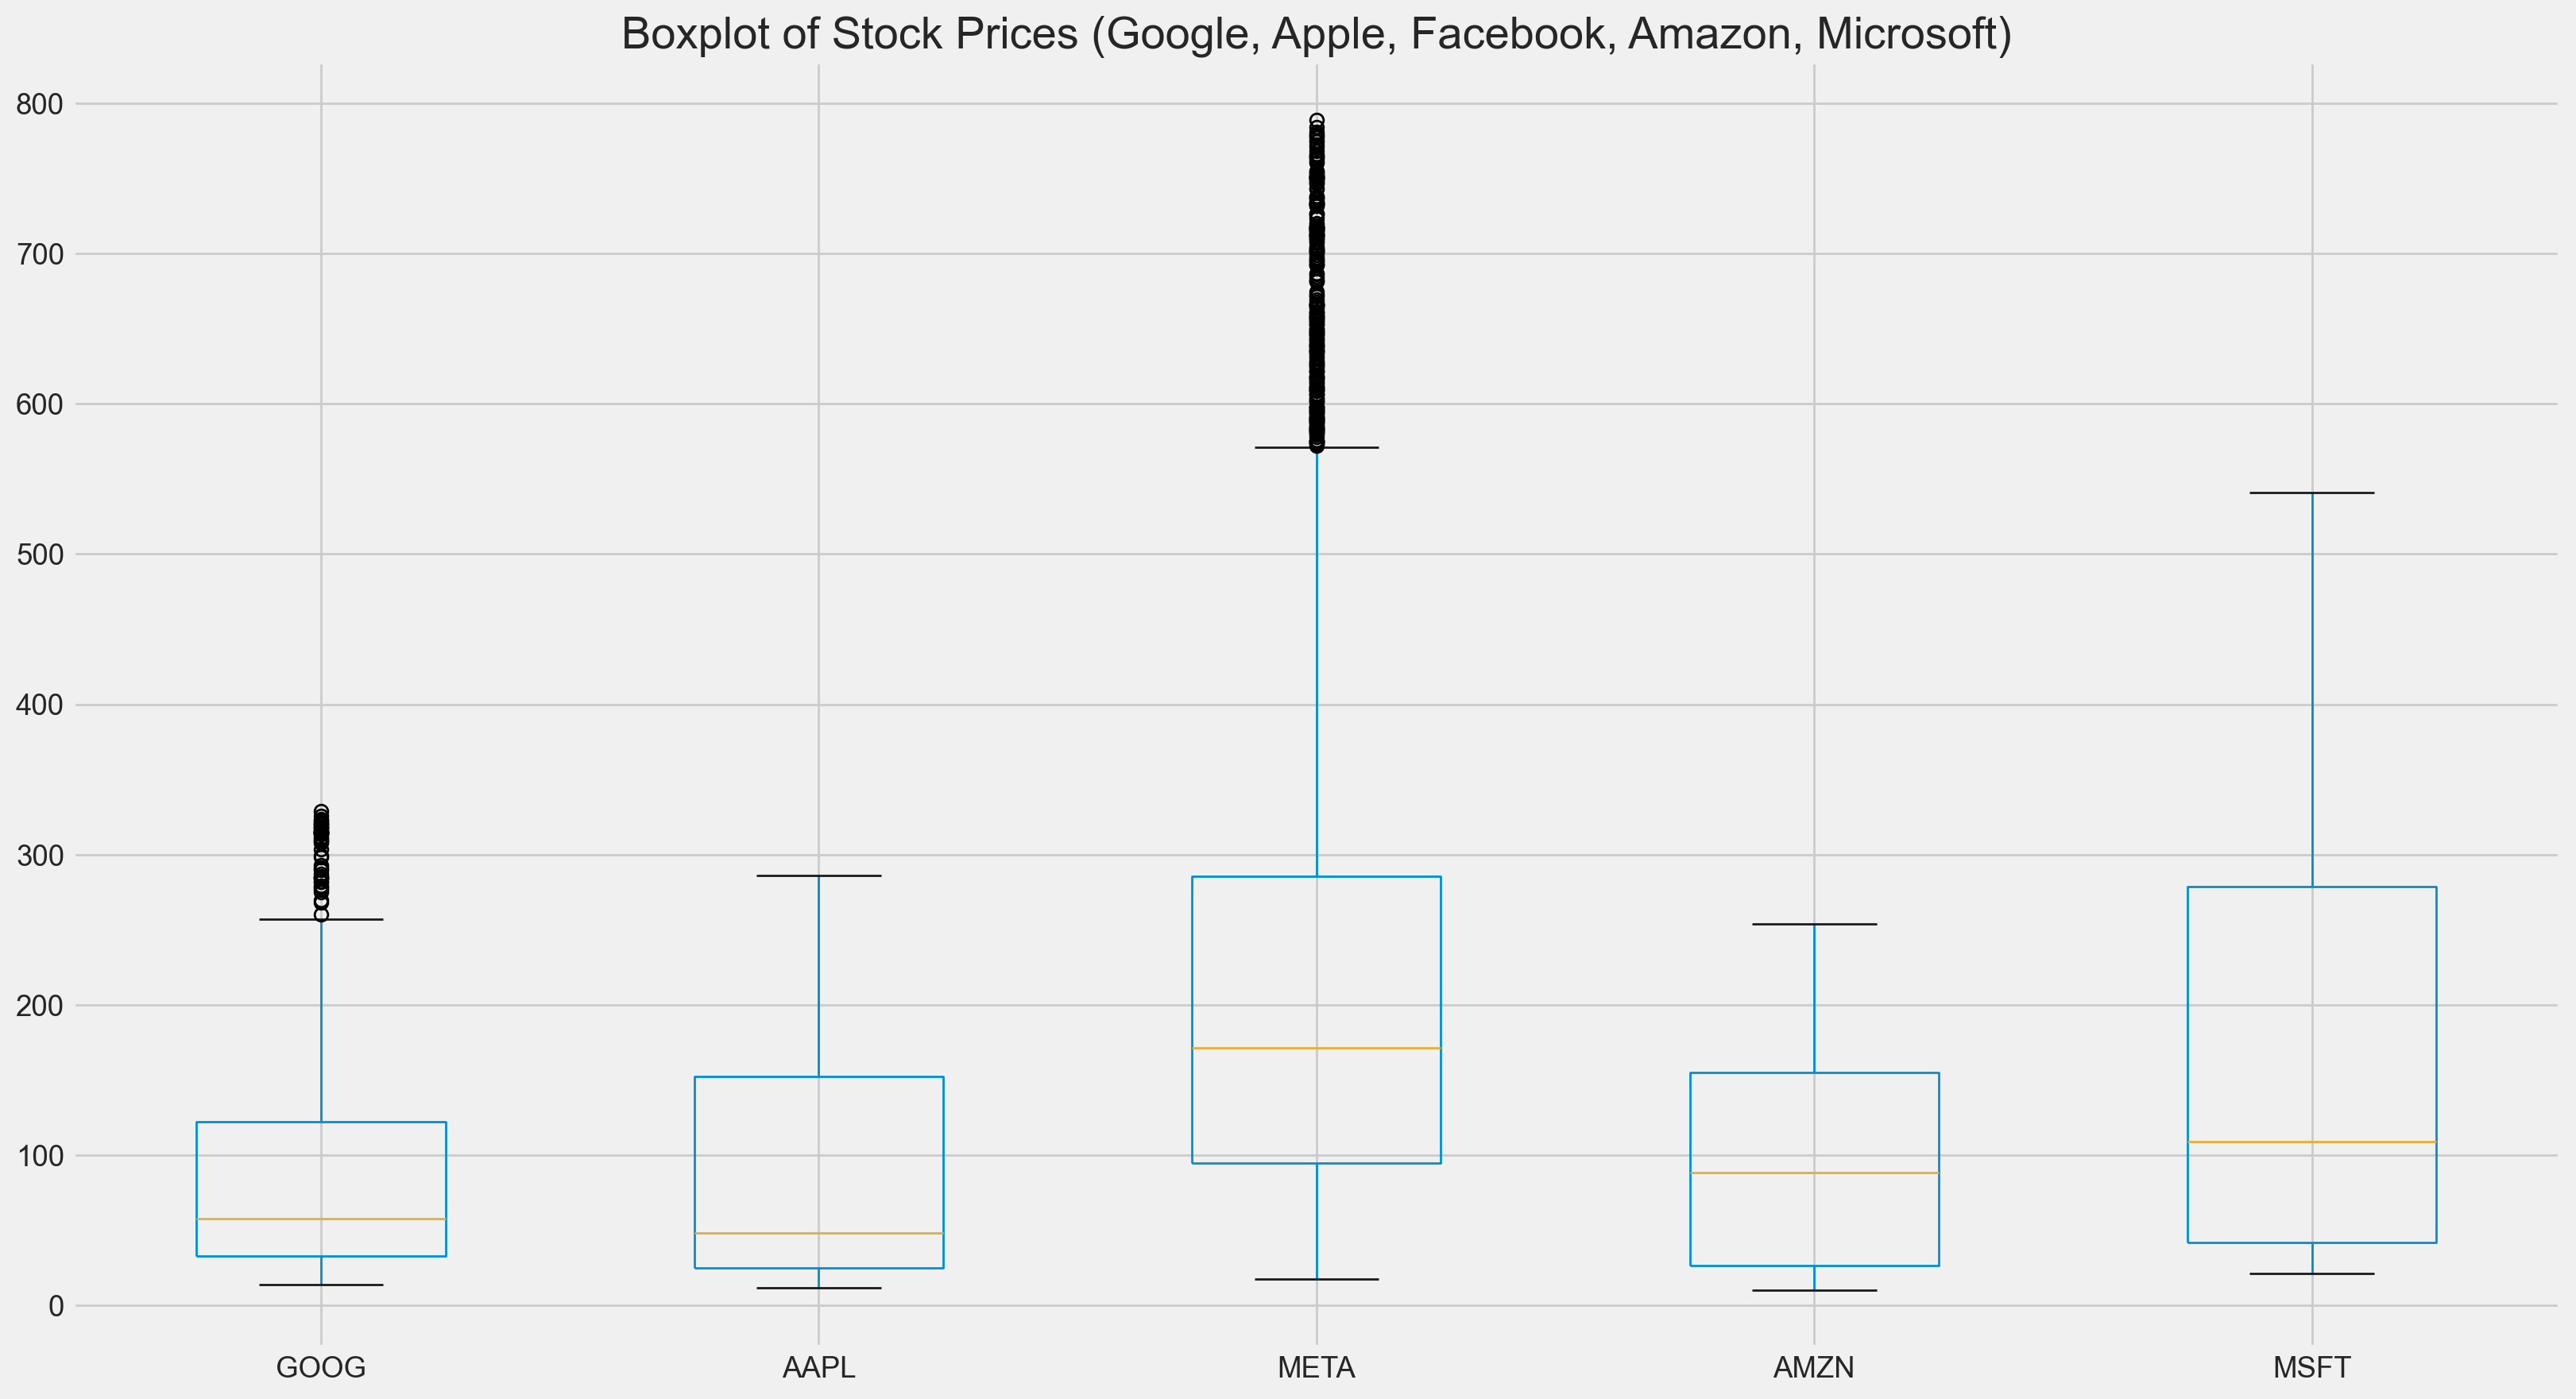

In [87]:
plt.style.use("fivethirtyeight")
dataset[['GOOG','AAPL','META','AMZN','MSFT']].boxplot()
plt.title("Boxplot of Stock Prices (Google, Apple, Facebook, Amazon, Microsoft)")
plt.show()

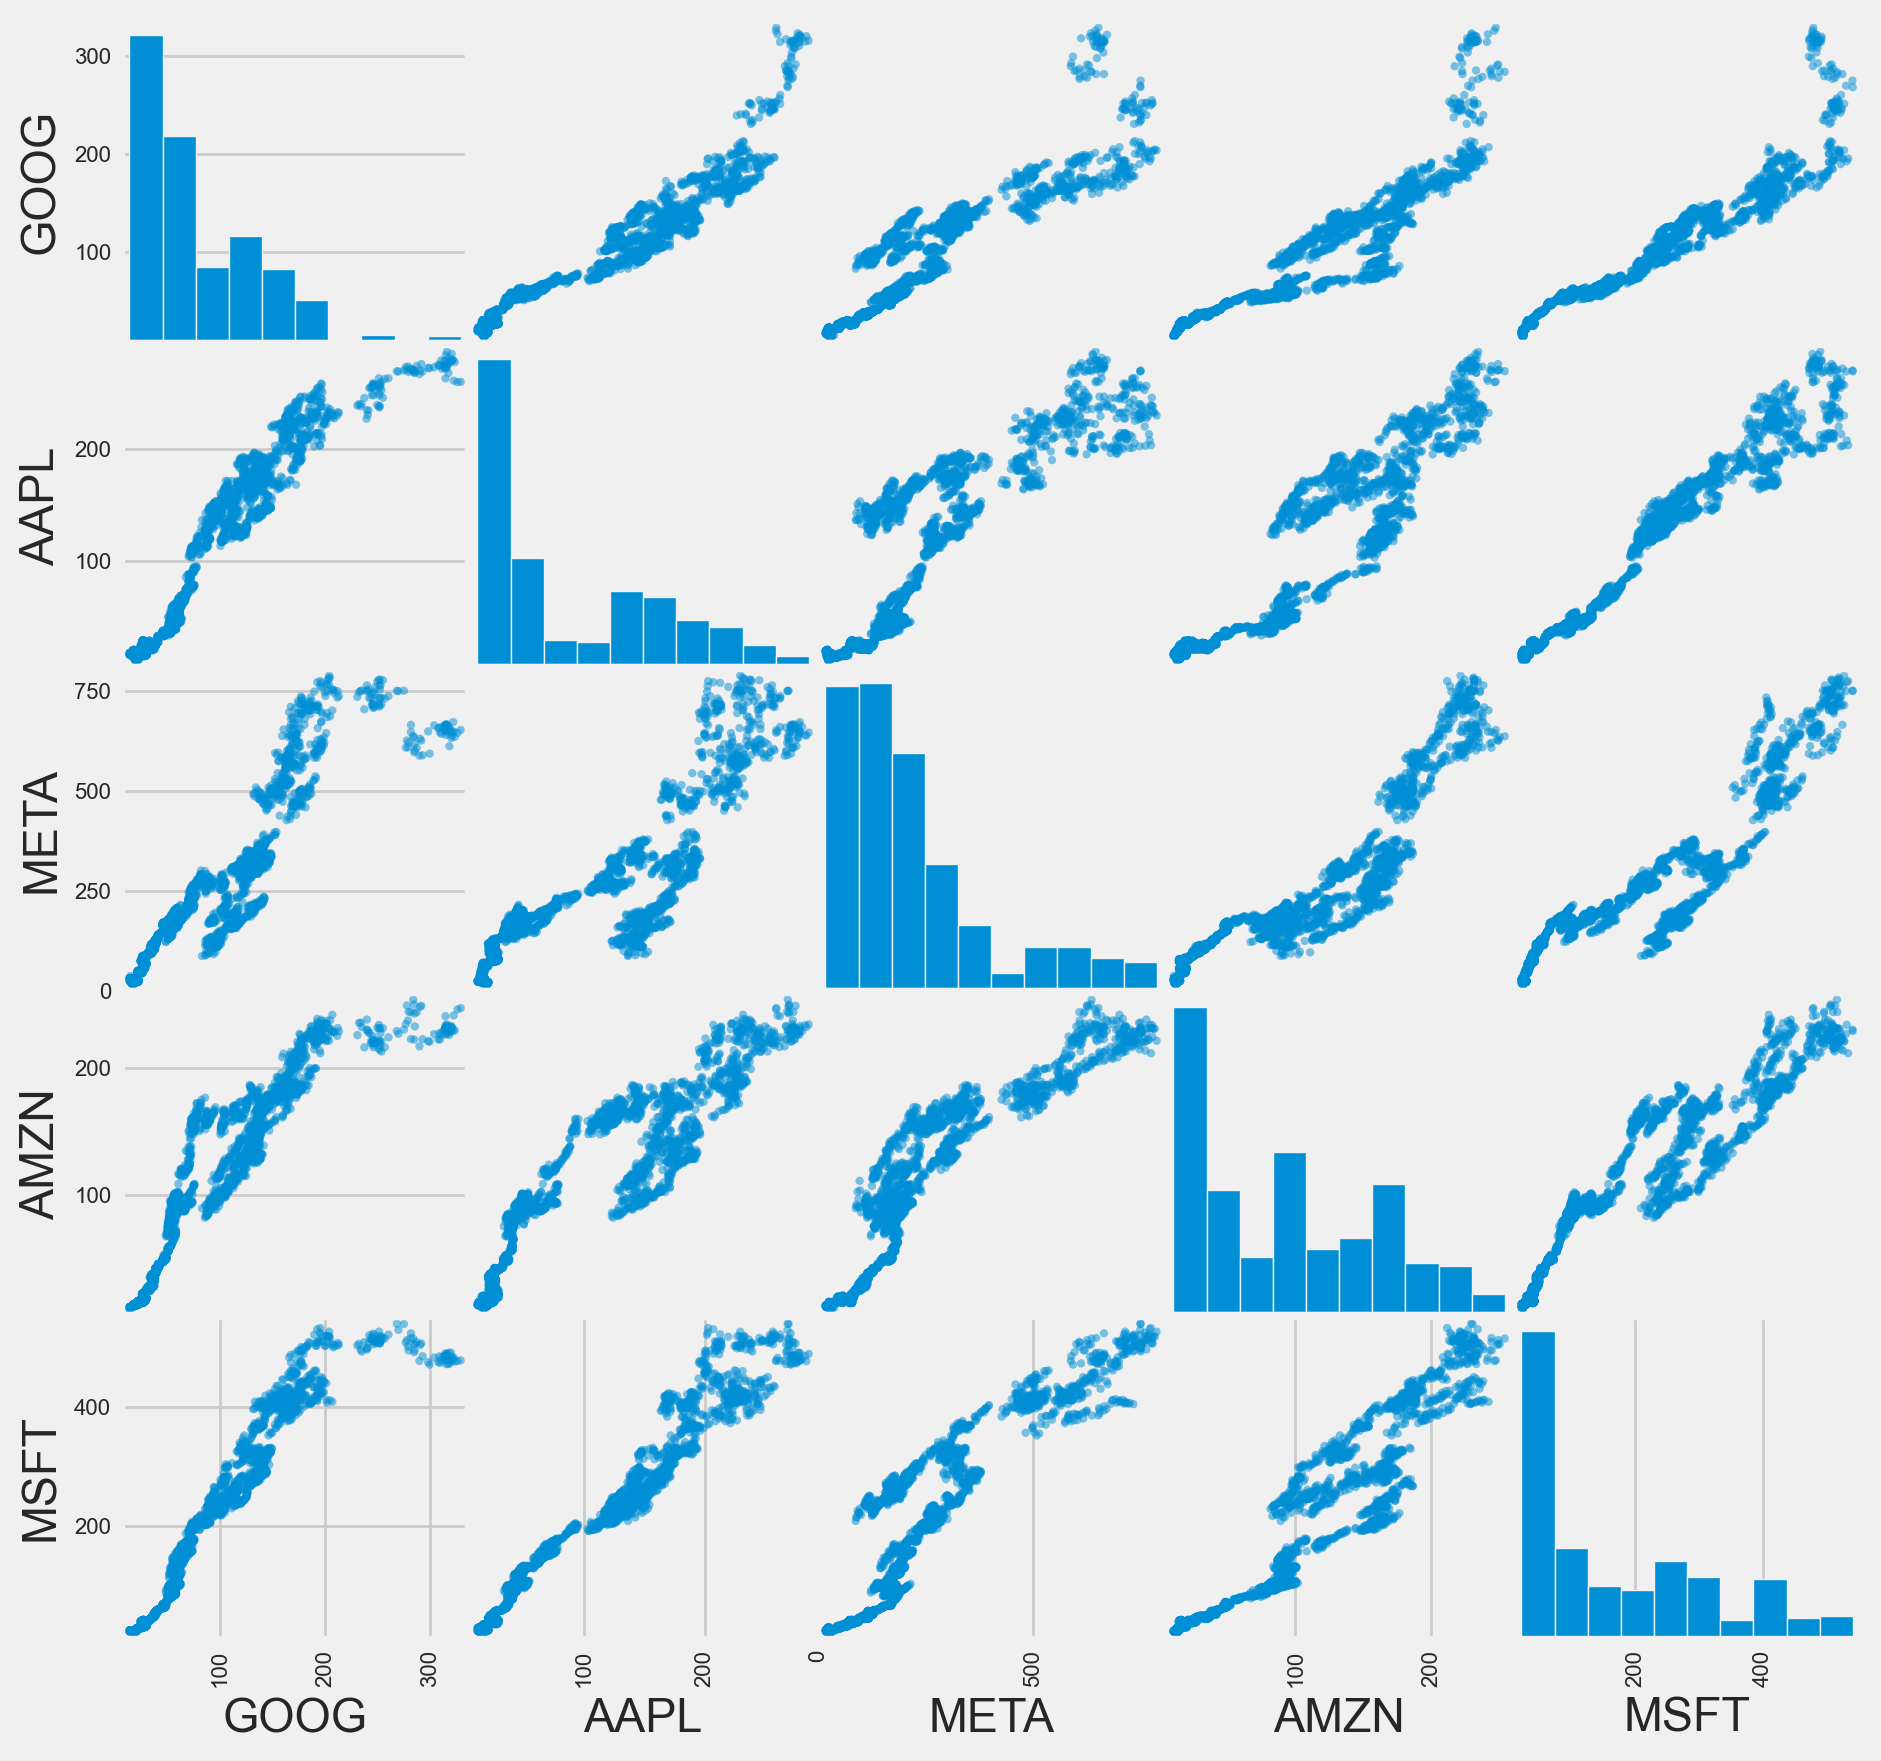

In [88]:
pd.plotting.scatter_matrix(dataset[['GOOG','AAPL','META','AMZN','MSFT']], figsize=(10,10))
plt.show()

In [89]:
%matplotlib inline
%config InlineBackend.figure_format='retina'
sns.set(style='whitegrid', palette='muted', font_scale=1.2)
HAPPY_COLORS_PALETTE = ["#01BEFE", "#FFDD00", "#FF7D00", "#FF006D","#93D30C","#8F00FF"]
sns.set_palette(sns.color_palette(HAPPY_COLORS_PALETTE))
rcParams['figure.figsize'] = 18, 10
RANDOM_SEED = 42 # I'm seeding with 42, if you try the same you will get the same results.
np.random.seed(RANDOM_SEED)

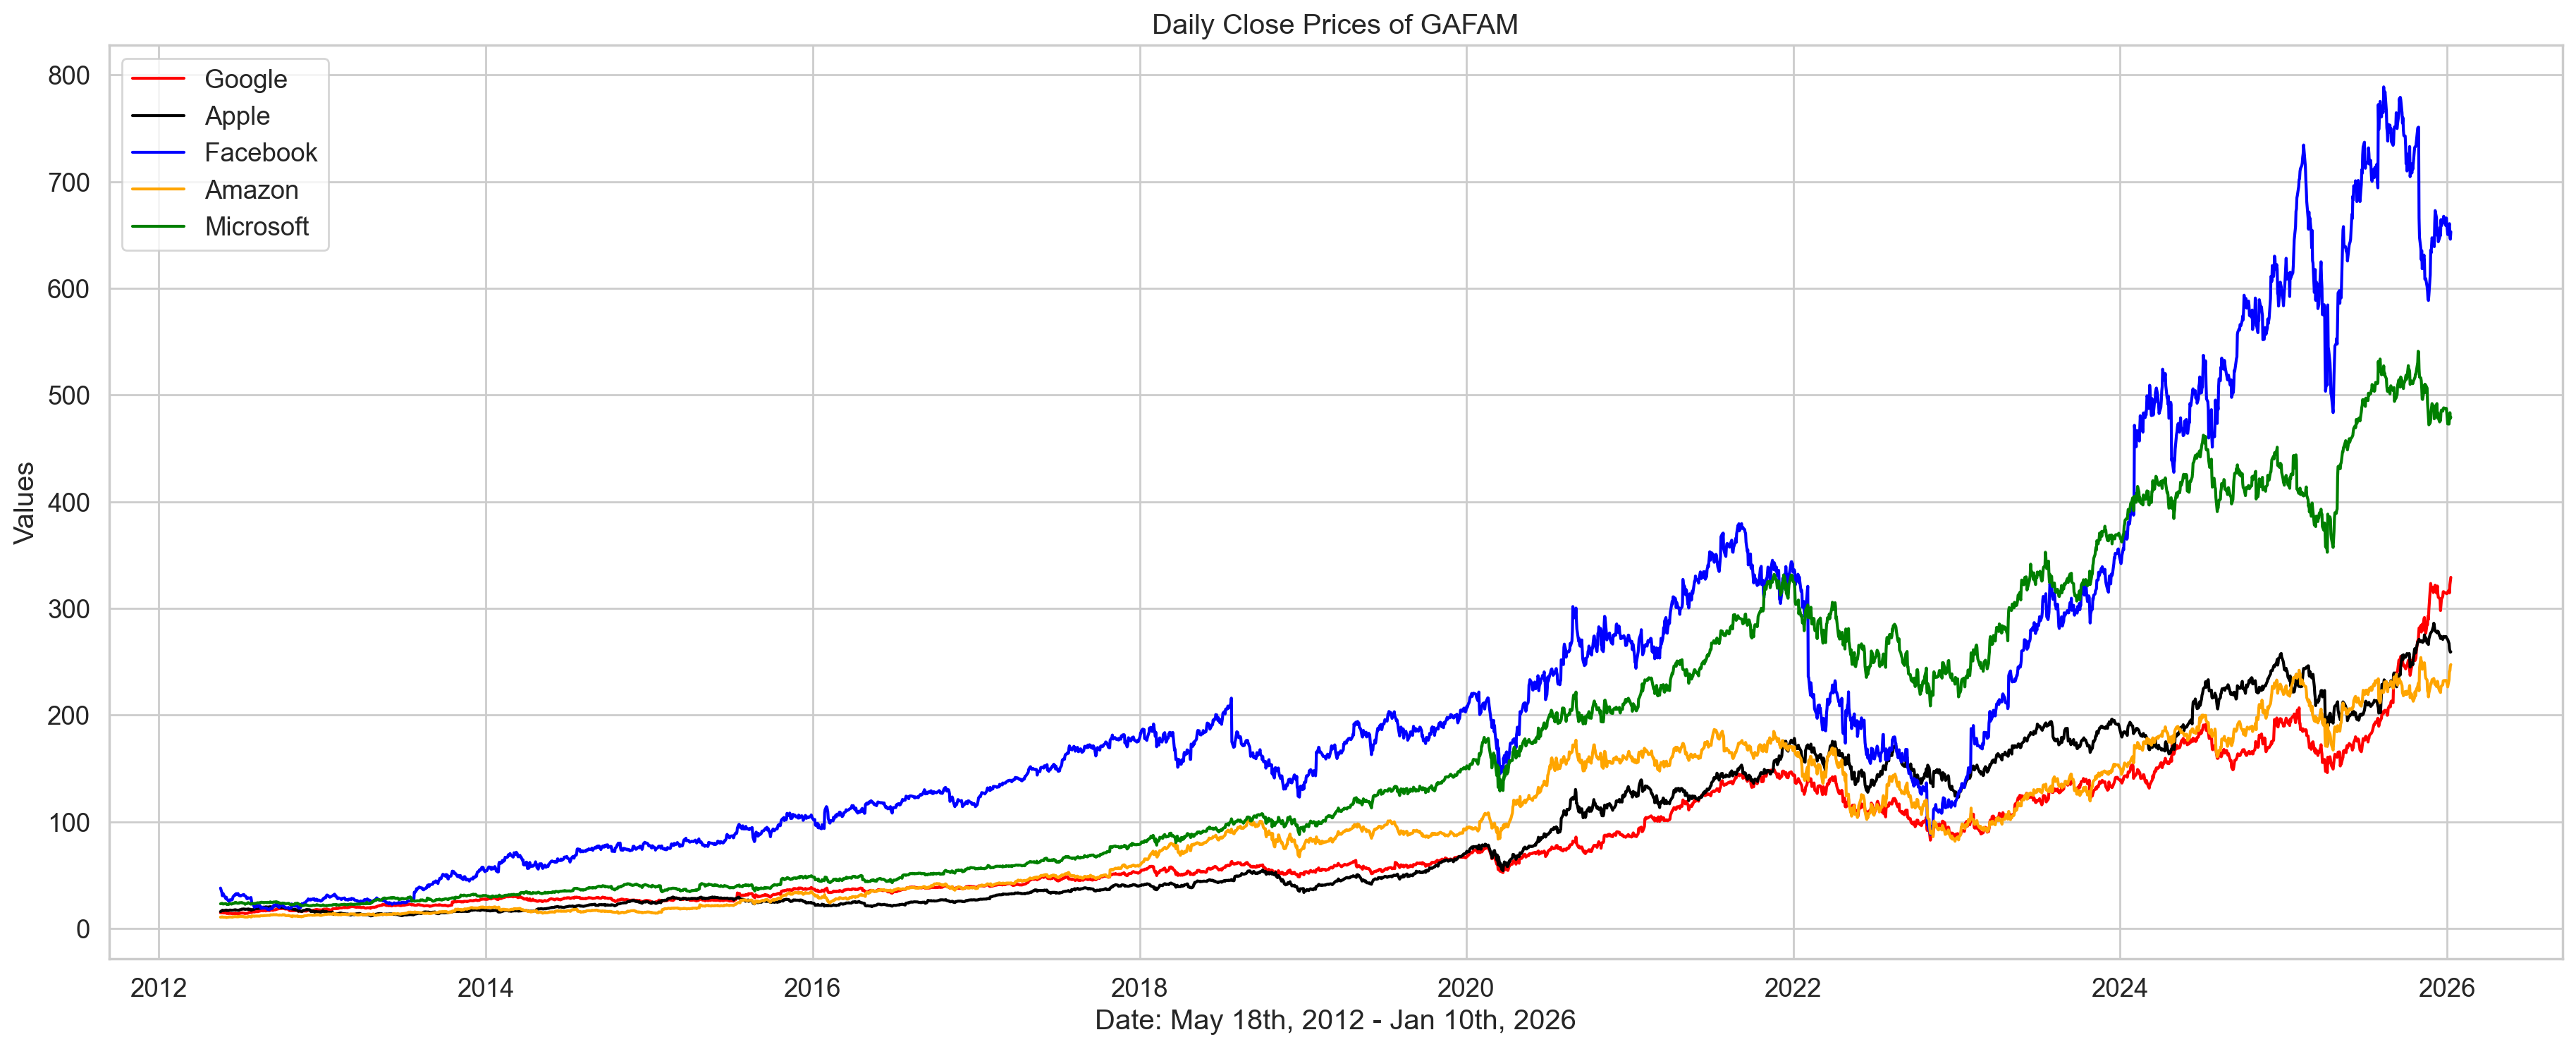

In [90]:
plt.figure(figsize=(20,8)) # Increases the Plot Size
plt.grid(True)
plt.title('Daily Close Prices of GAFAM')
plt.xlabel('Date: May 18th, 2012 - Jan 10th, 2026')
plt.ylabel('Values')
plt.plot(dataset['GOOG'], 'red', label='Google')
plt.plot(dataset['AAPL'], 'black', label='Apple')
plt.plot(dataset['META'], 'blue', label='Facebook')
plt.plot(dataset['AMZN'], 'orange', label='Amazon')
plt.plot(dataset['MSFT'], 'green', label='Microsoft')
plt.legend()
plt.show()

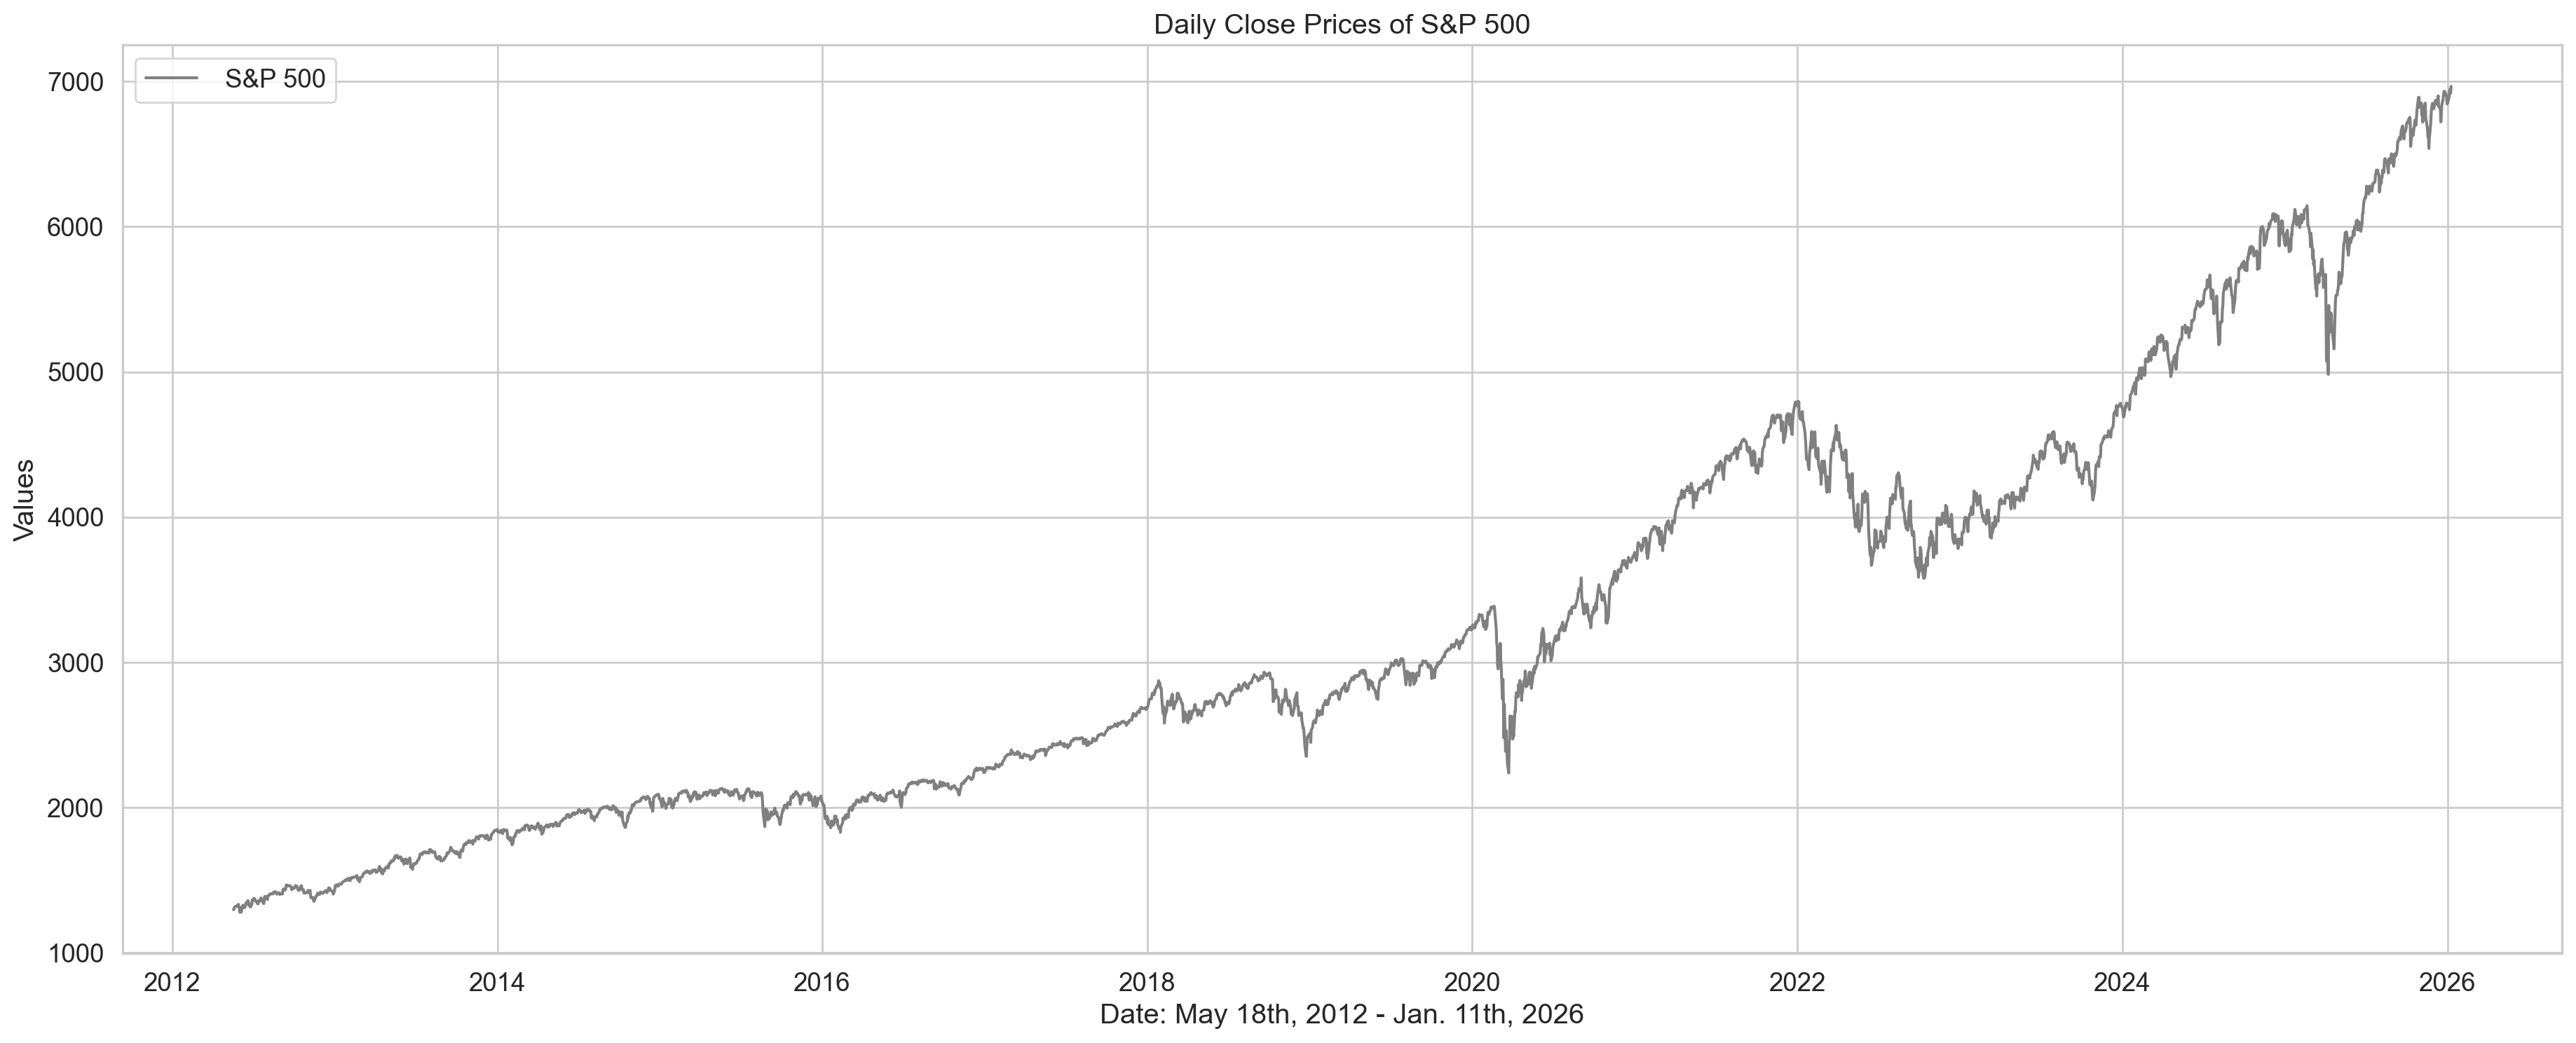

In [91]:
plt.figure(figsize=(20,8)) # Increases the Plot Size
plt.grid(True)
plt.title('Daily Close Prices of S&P 500')
plt.xlabel('Date: May 18th, 2012 - Jan. 11th, 2026')
plt.ylabel('Values')
plt.plot(dataset['GSPC'], 'grey', label=' S&P 500')
plt.legend()
plt.show()

In [92]:
#Create a new columns Return in the dataset for each company's
dataset['R_GOOG'] = dataset[['GOOG']].pct_change(1)
dataset['R_AAPL'] = dataset[['AAPL']].pct_change(1)
dataset['R_META'] = dataset[['META']].pct_change(1)
dataset['R_AMZN'] = dataset[['AMZN']].pct_change(1)
dataset['R_MSFT'] = dataset[['MSFT']].pct_change(1)
dataset['R_GSPC'] = dataset[['GSPC']].pct_change(1)
dataset.head

<bound method NDFrame.head of                   GOOG        AAPL        META        AMZN        MSFT  \
Date                                                                     
2012-05-18   14.842627   15.906649   37.964802   10.692500   23.225681   
2012-05-21   15.181554   16.833370   33.793934   10.905500   23.606564   
2012-05-22   14.852516   16.704115   30.784960   10.766500   23.614494   
2012-05-23   15.066601   17.111689   31.778023   10.864000   23.098719   
2012-05-24   14.923219   16.954538   32.800877   10.762000   23.066977   
...                ...         ...         ...         ...         ...   
2026-01-05  317.320007  267.260010  658.789978  233.059998  472.850006   
2026-01-06  314.549988  262.359985  660.619995  240.929993  478.510010   
2026-01-07  322.429993  260.329987  648.690002  241.559998  483.470001   
2026-01-08  326.010010  259.040009  646.059998  246.289993  478.109985   
2026-01-09  329.140015  259.369995  653.059998  247.380005  479.279999   

       

In [93]:
dataset.describe()


GOOG         AAPL         META         AMZN         MSFT  \
count  3431.000000  3431.000000  3431.000000  3431.000000  3431.000000   
mean     80.645193    89.550415   220.472911    93.365481   172.682643   
std      60.229386    75.698519   178.937563    67.586453   146.885690   
min      13.820404    11.885282    17.607010    10.411000    21.236233   
25%      32.861036    25.045879    94.638908    26.862250    41.860209   
50%      57.780140    48.428223   171.323242    88.443497   108.914001   
75%     122.501225   152.662094   285.565262   155.199997   278.953308   
max     329.140015   286.190002   788.823792   254.000000   541.057373   

              GSPC       R_GOOG       R_AAPL       R_META       R_AMZN  \
count  3431.000000  3430.000000  3430.000000  3430.000000  3430.000000   
mean   3251.676950     0.001054     0.000973     0.001142     0.001121   
std    1422.968900     0.017363     0.017845     0.025002     0.020287   
min    1278.040039    -0.111008    -0.128647    -0.263901    -0.140494   
25%    2075.234985    -0.007049    -0.007395    -0.010045    -0.008800   
50%    2834.399902     0.000976     0.000895     0.000989     0.000916   
75%    4251.415039     0.009628     0.010101     0.012709     0.011663   
max    6966.279785     0.160524     0.153289     0.296115     0.141311   

            R_MSFT       R_GSPC  
count  3430.000000  3430.000000  
mean      0.001017     0.000547  
std       0.016366     0.010641  
min      -0.147390    -0.119841  
25%      -0.006725    -0.003612  
50%       0.000786     0.000697  
75%       0.009249     0.005607  
max       0.142169     0.095154

In [94]:
dataset[['R_GOOG','R_AAPL','R_META','R_AMZN','R_MSFT', 'R_GSPC']].std()


R_GOOG    0.017363
R_AAPL    0.017845
R_META    0.025002
R_AMZN    0.020287
R_MSFT    0.016366
R_GSPC    0.010641
dtype: float64

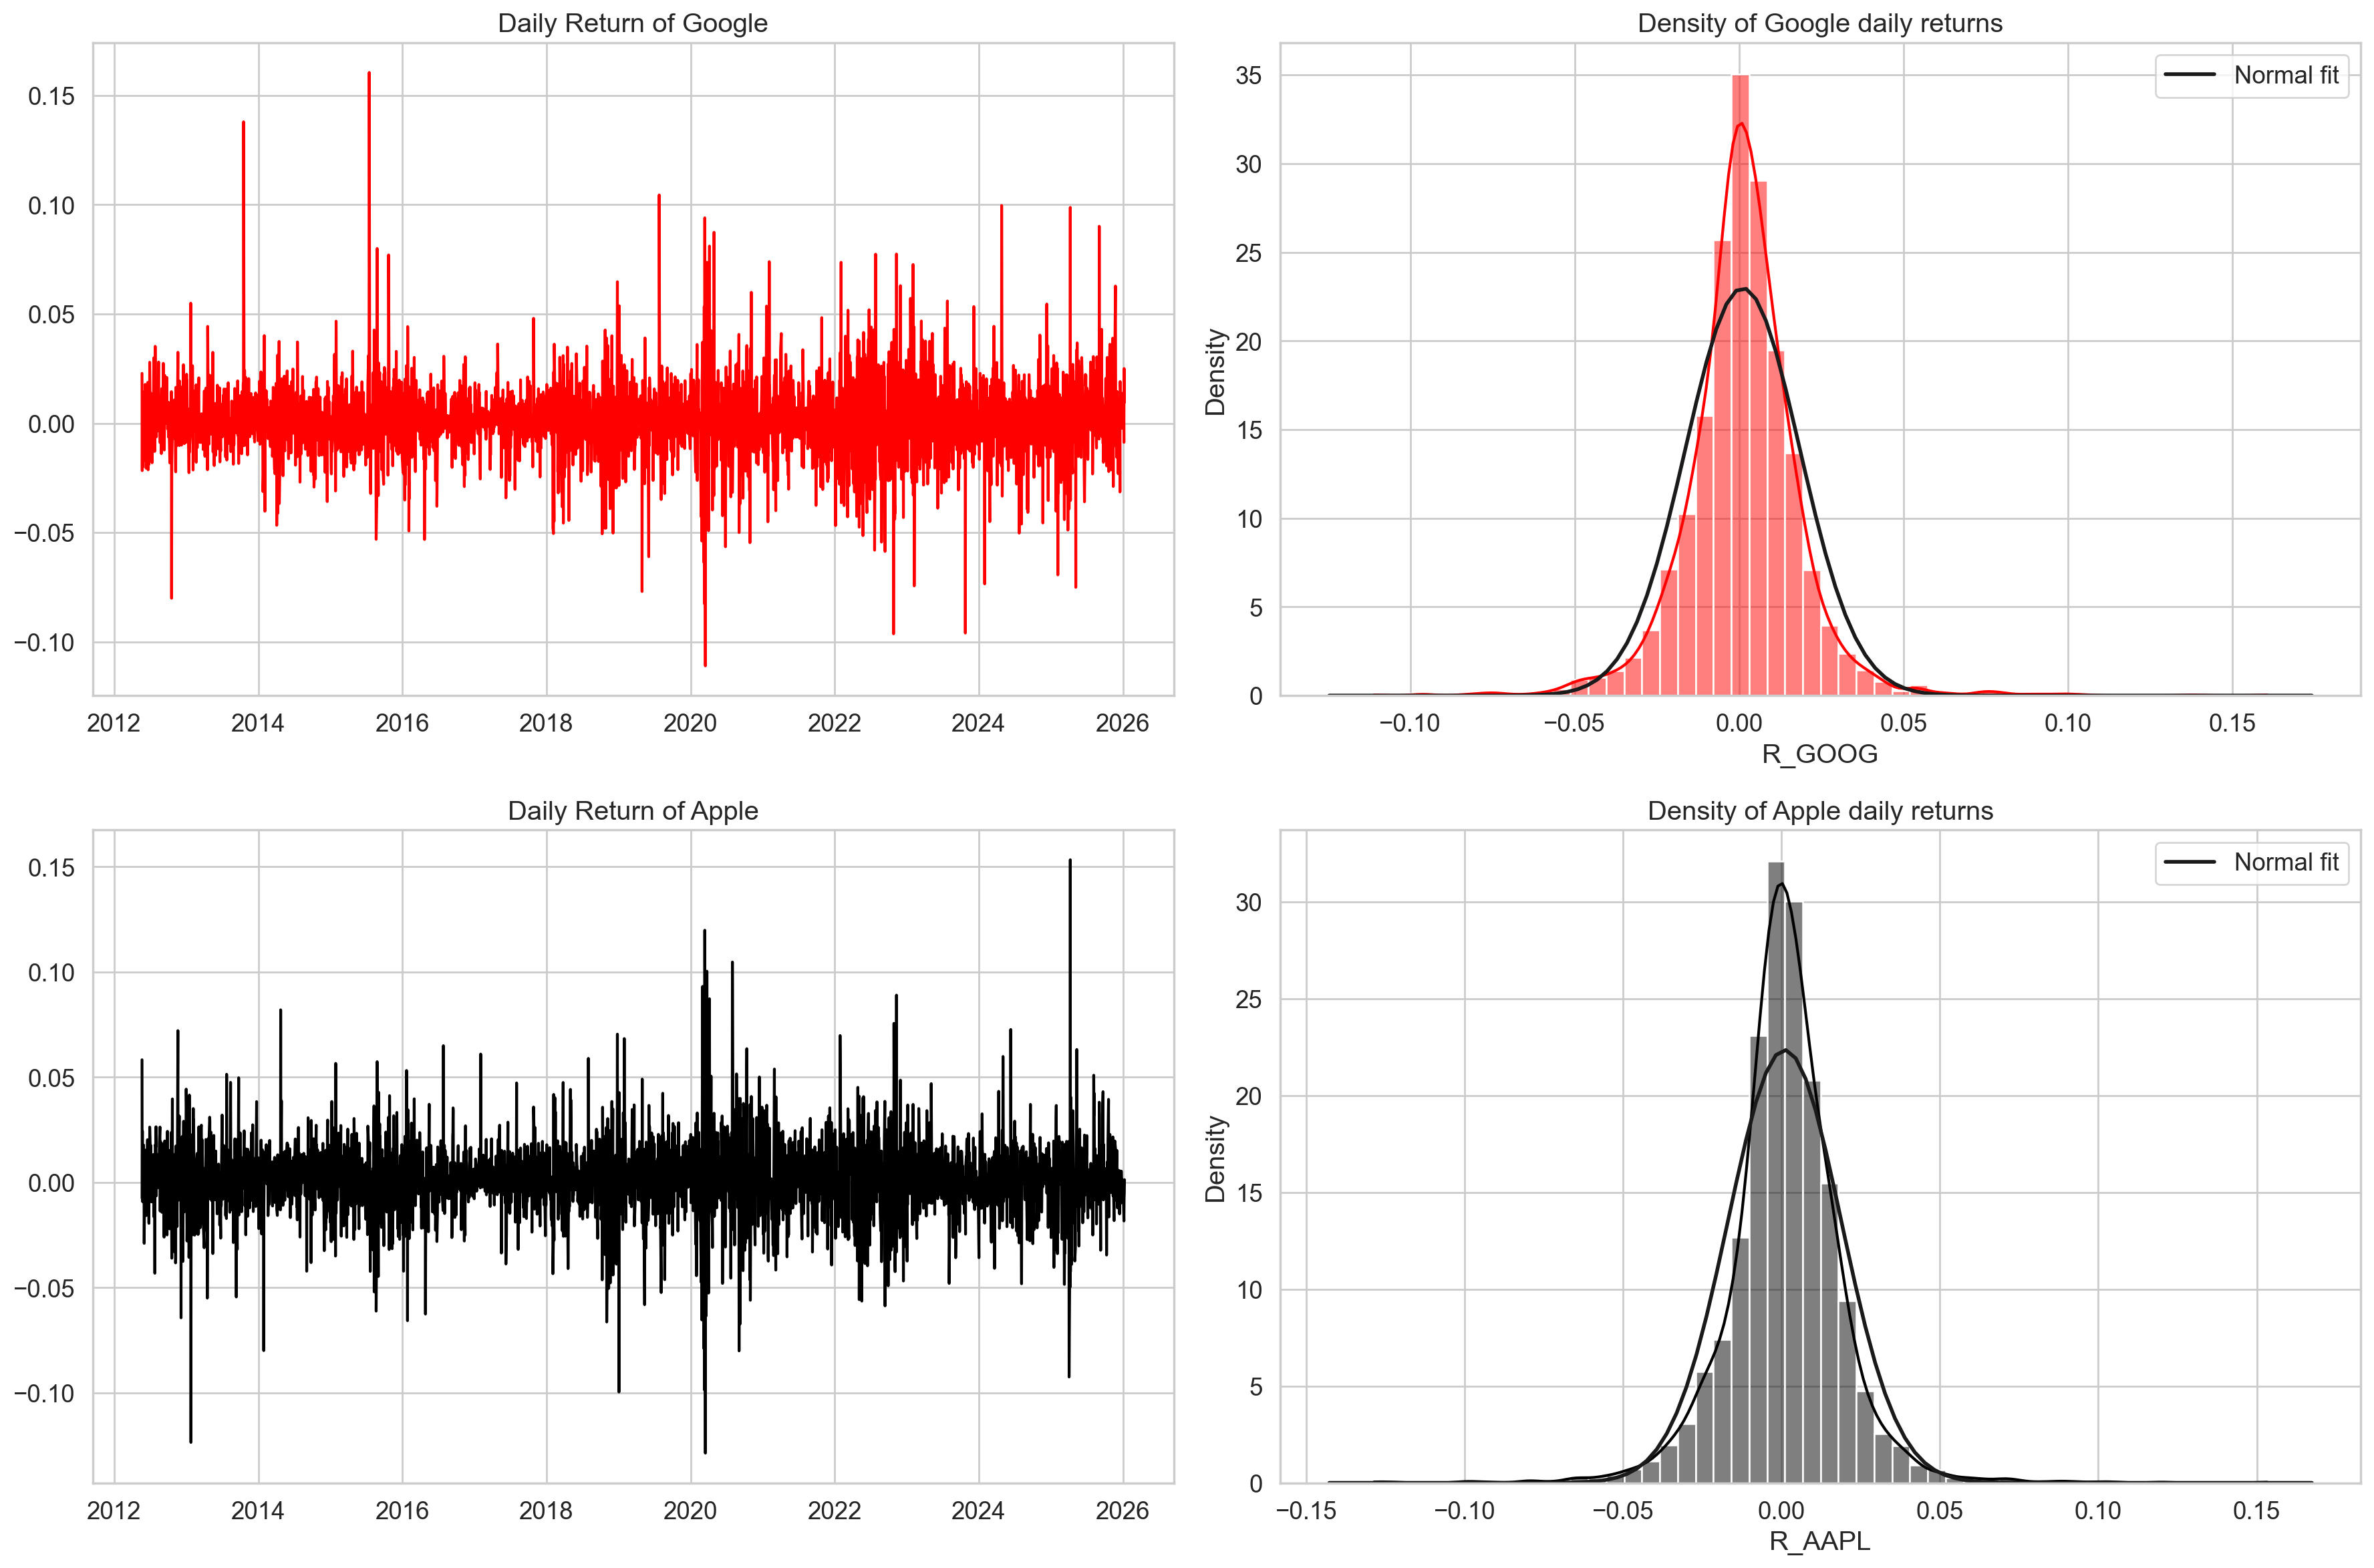

In [95]:
from scipy import stats

with sns.axes_style("whitegrid"):
    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(18,12))  # Changed subplot to subplots
    
    axes[0][0].plot(dataset['R_GOOG'], color='red')
    axes[0][0].set_title('Daily Return of Google')

    # Changed distplot to histplot with kde
    sns.histplot(dataset['R_GOOG'], kde=True, stat='density', color='red', bins=50, ax=axes[0][1])
    # Add normal distribution fit
    mu, std = stats.norm.fit(dataset['R_GOOG'].dropna())
    xmin, xmax = axes[0][1].get_xlim()
    x = np.linspace(xmin, xmax, 100)
    p = stats.norm.pdf(x, mu, std)
    axes[0][1].plot(x, p, 'k', linewidth=2, label='Normal fit')
    axes[0][1].set_title('Density of Google daily returns')
    axes[0][1].legend()

    axes[1][0].plot(dataset['R_AAPL'], color='black')
    axes[1][0].set_title('Daily Return of Apple')
    
    # Changed distplot to histplot with kde (also fixed 'bin' to 'bins')
    sns.histplot(dataset['R_AAPL'], kde=True, stat='density', color='black', bins=50, ax=axes[1][1])
    # Add normal distribution fit
    mu, std = stats.norm.fit(dataset['R_AAPL'].dropna())
    xmin, xmax = axes[1][1].get_xlim()
    x = np.linspace(xmin, xmax, 100)
    p = stats.norm.pdf(x, mu, std)
    axes[1][1].plot(x, p, 'k', linewidth=2, label='Normal fit')
    axes[1][1].set_title('Density of Apple daily returns')
    axes[1][1].legend()

plt.tight_layout()
plt.show()

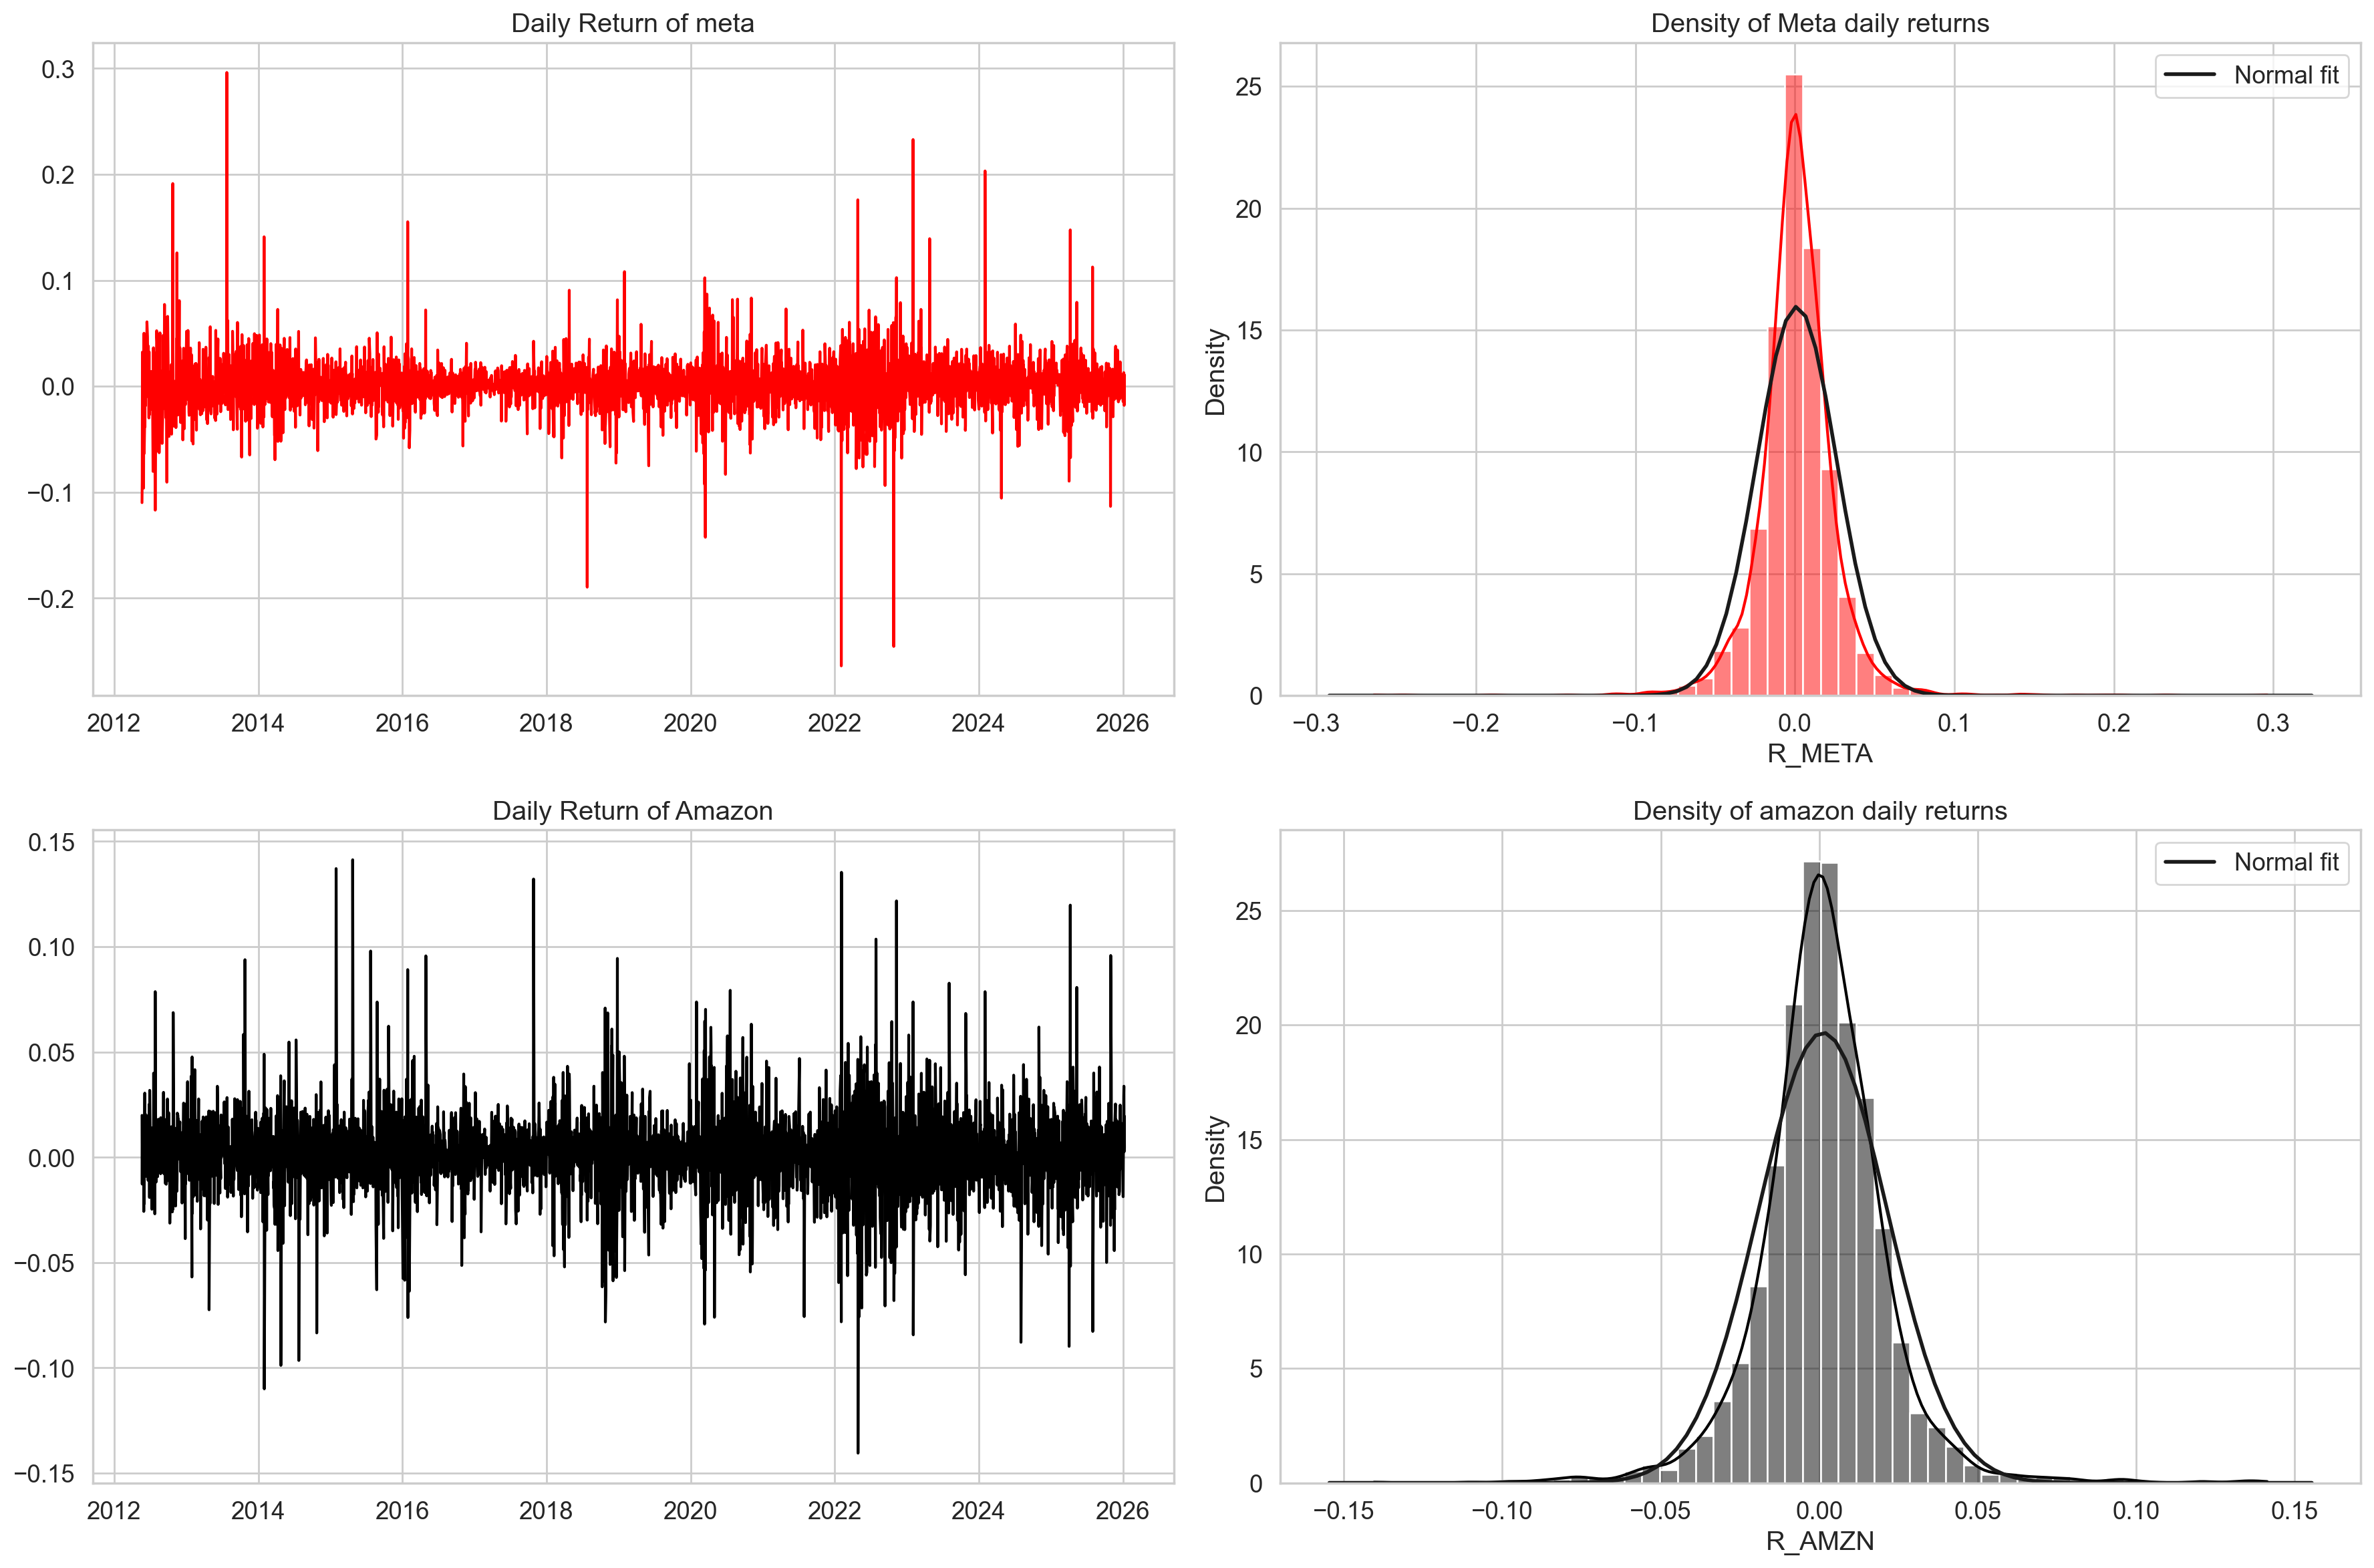

In [96]:
from scipy import stats

with sns.axes_style("whitegrid"):
    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(18,12))  # Changed subplot to subplots
    
    axes[0][0].plot(dataset['R_META'], color='red')
    axes[0][0].set_title('Daily Return of meta')

    # Changed distplot to histplot with kde
    sns.histplot(dataset['R_META'], kde=True, stat='density', color='red', bins=50, ax=axes[0][1])
    # Add normal distribution fit
    mu, std = stats.norm.fit(dataset['R_META'].dropna())
    xmin, xmax = axes[0][1].get_xlim()
    x = np.linspace(xmin, xmax, 100)
    p = stats.norm.pdf(x, mu, std)
    axes[0][1].plot(x, p, 'k', linewidth=2, label='Normal fit')
    axes[0][1].set_title('Density of Meta daily returns')
    axes[0][1].legend()

    axes[1][0].plot(dataset['R_AMZN'], color='black')
    axes[1][0].set_title('Daily Return of Amazon')
    
    # Changed distplot to histplot with kde (also fixed 'bin' to 'bins')
    sns.histplot(dataset['R_AMZN'], kde=True, stat='density', color='black', bins=50, ax=axes[1][1])
    # Add normal distribution fit
    mu, std = stats.norm.fit(dataset['R_AMZN'].dropna())
    xmin, xmax = axes[1][1].get_xlim()
    x = np.linspace(xmin, xmax, 100)
    p = stats.norm.pdf(x, mu, std)
    axes[1][1].plot(x, p, 'k', linewidth=2, label='Normal fit')
    axes[1][1].set_title('Density of amazon daily returns')
    axes[1][1].legend()

plt.tight_layout()
plt.show()

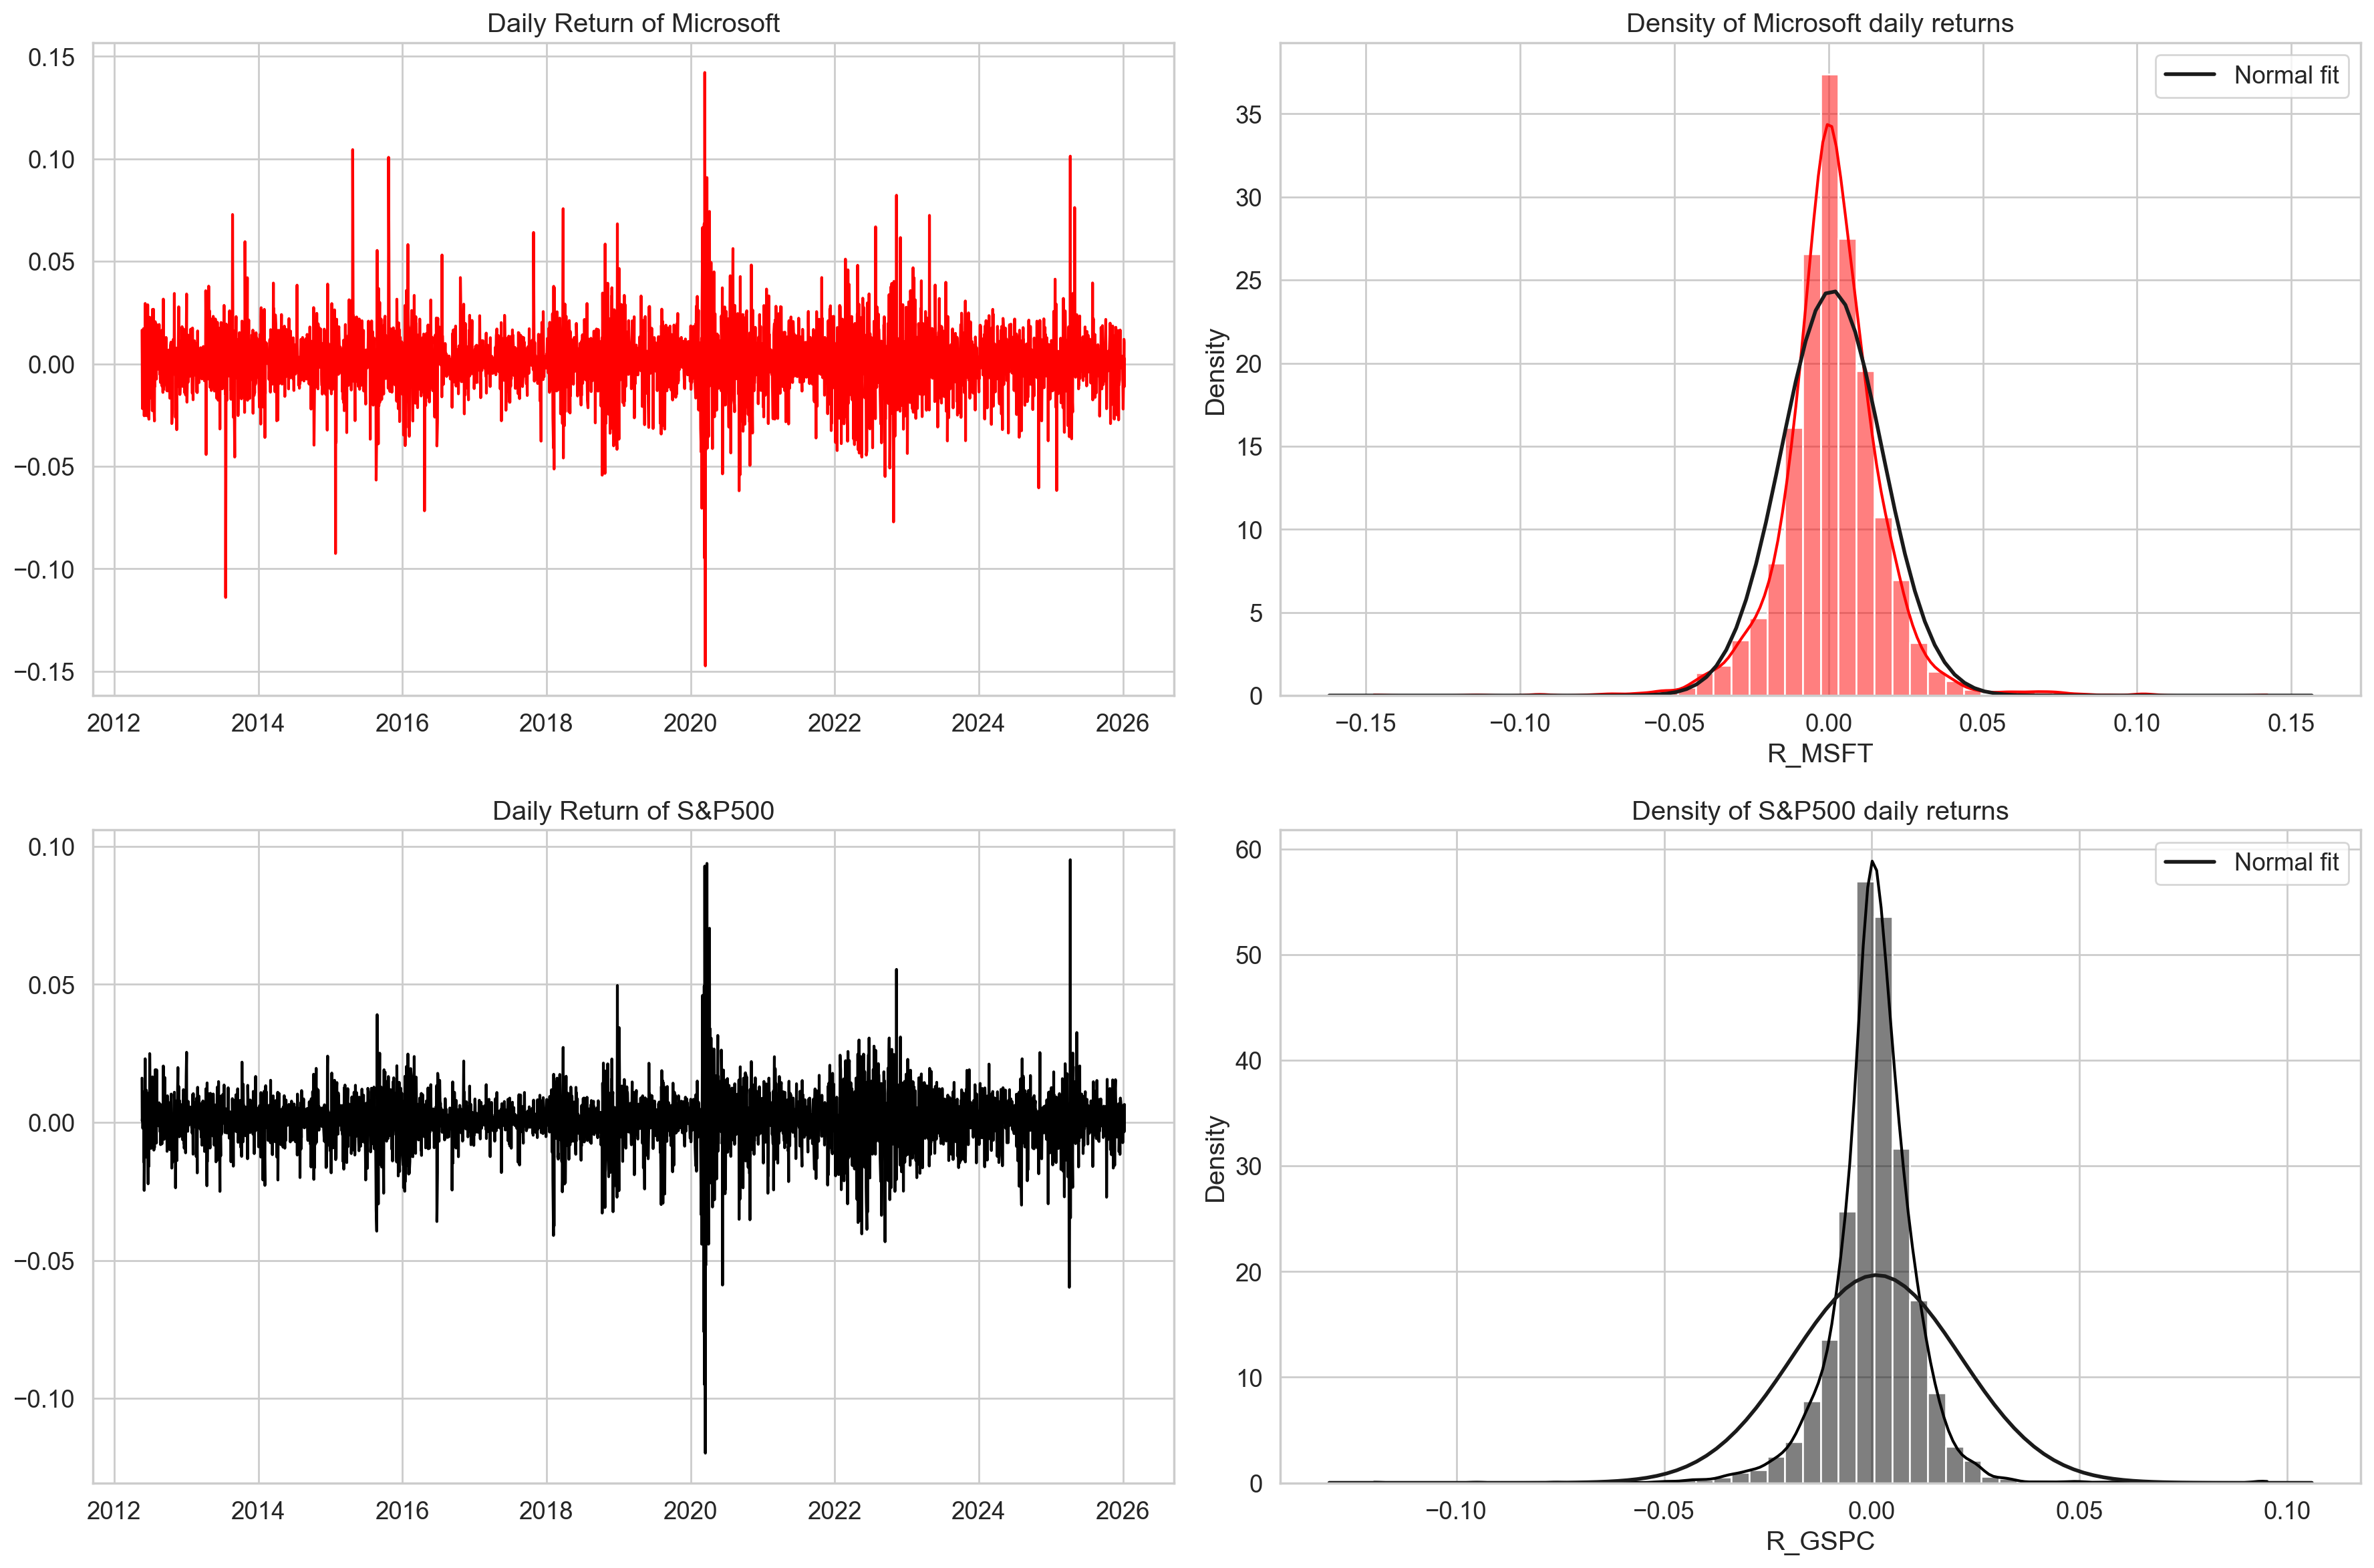

In [97]:
from scipy import stats

with sns.axes_style("whitegrid"):
    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(18,12))  # Changed subplot to subplots
    
    axes[0][0].plot(dataset['R_MSFT'], color='red')
    axes[0][0].set_title('Daily Return of Microsoft')

    # Changed distplot to histplot with kde
    sns.histplot(dataset['R_MSFT'], kde=True, stat='density', color='red', bins=50, ax=axes[0][1])
    # Add normal distribution fit
    mu, std = stats.norm.fit(dataset['R_MSFT'].dropna())
    xmin, xmax = axes[0][1].get_xlim()
    x = np.linspace(xmin, xmax, 100)
    p = stats.norm.pdf(x, mu, std)
    axes[0][1].plot(x, p, 'k', linewidth=2, label='Normal fit')
    axes[0][1].set_title('Density of Microsoft daily returns')
    axes[0][1].legend()

    axes[1][0].plot(dataset['R_GSPC'], color='black')
    axes[1][0].set_title('Daily Return of S&P500')
    
    # Changed distplot to histplot with kde (also fixed 'bin' to 'bins')
    sns.histplot(dataset['R_GSPC'], kde=True, stat='density', color='black', bins=50, ax=axes[1][1])
    # Add normal distribution fit
    mu, std = stats.norm.fit(dataset['R_AMZN'].dropna())
    xmin, xmax = axes[1][1].get_xlim()
    x = np.linspace(xmin, xmax, 100)
    p = stats.norm.pdf(x, mu, std)
    axes[1][1].plot(x, p, 'k', linewidth=2, label='Normal fit')
    axes[1][1].set_title('Density of S&P500 daily returns')
    axes[1][1].legend()

plt.tight_layout()
plt.show()

In [98]:
# corr btw closing price

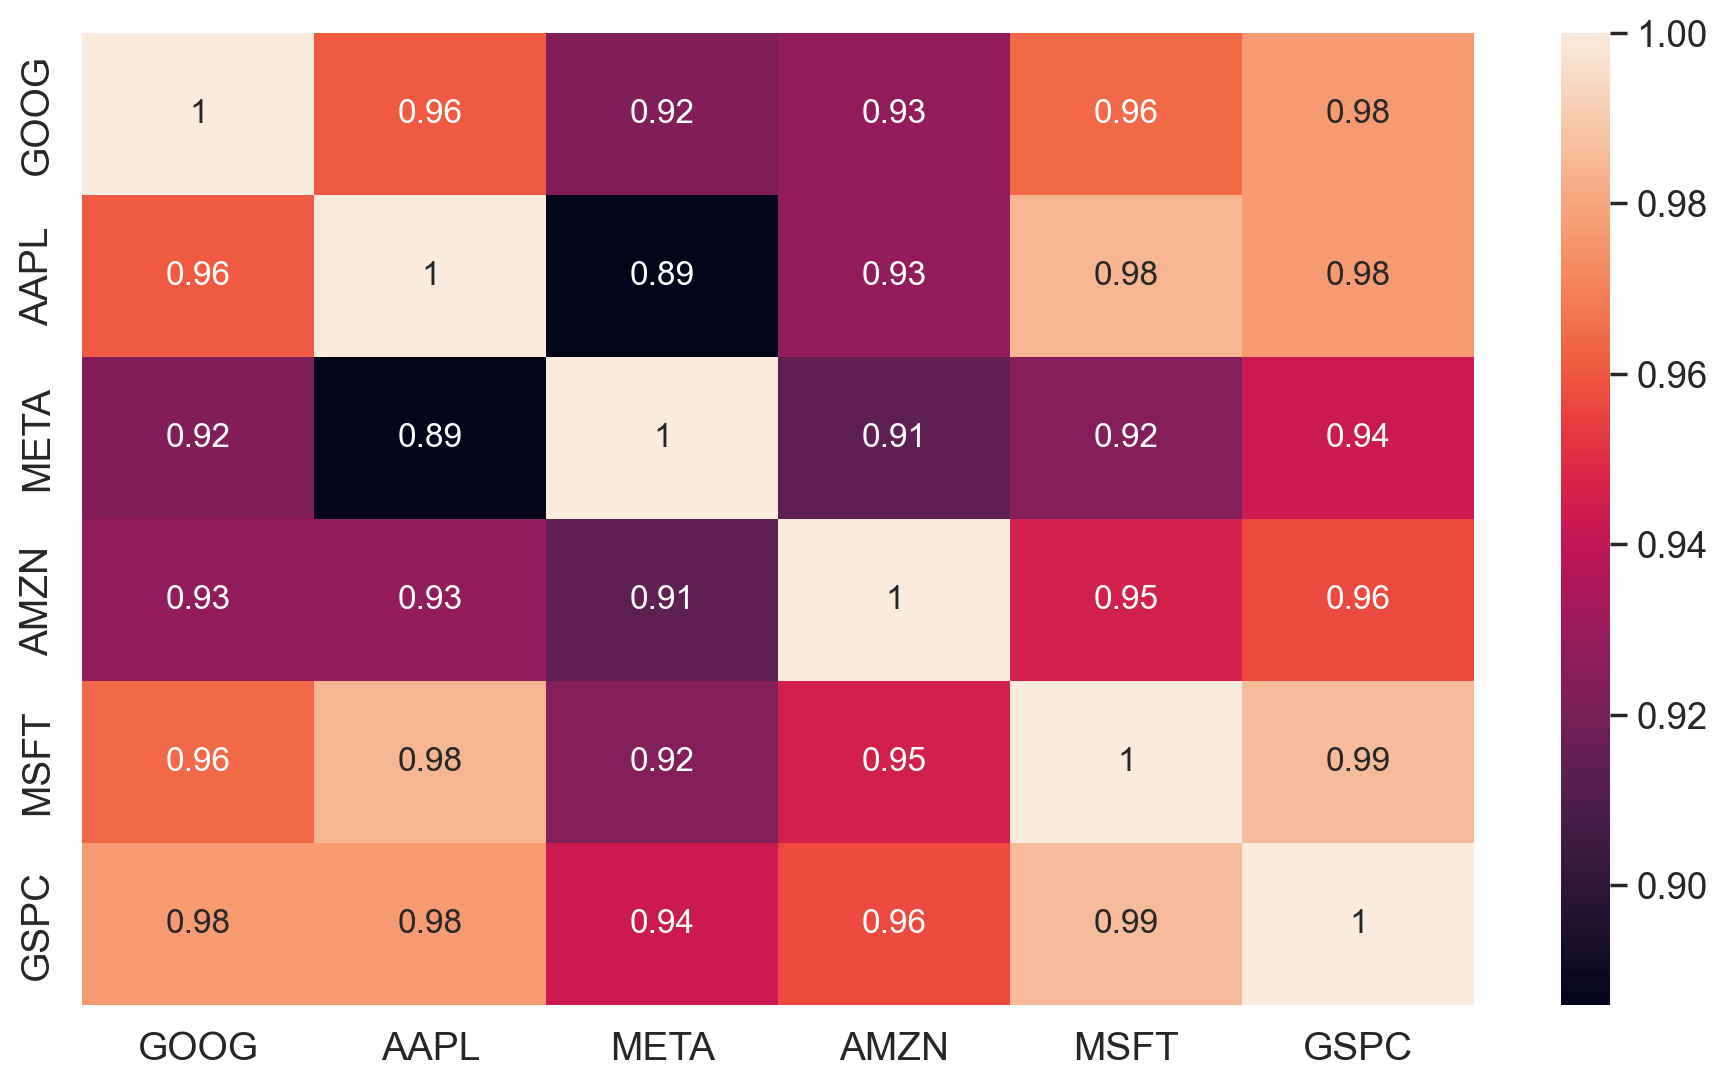

In [99]:
corr = dataset[['GOOG','AAPL','META','AMZN','MSFT', 'GSPC']].corr()
sns.heatmap(corr,xticklabels=corr.columns.values,yticklabels=corr.columns.values,annot=True,annot_kws={'size':12})
heat_map=plt.gcf()
heat_map.set_size_inches(10,6)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt. show()

In [100]:
# corr btw returns

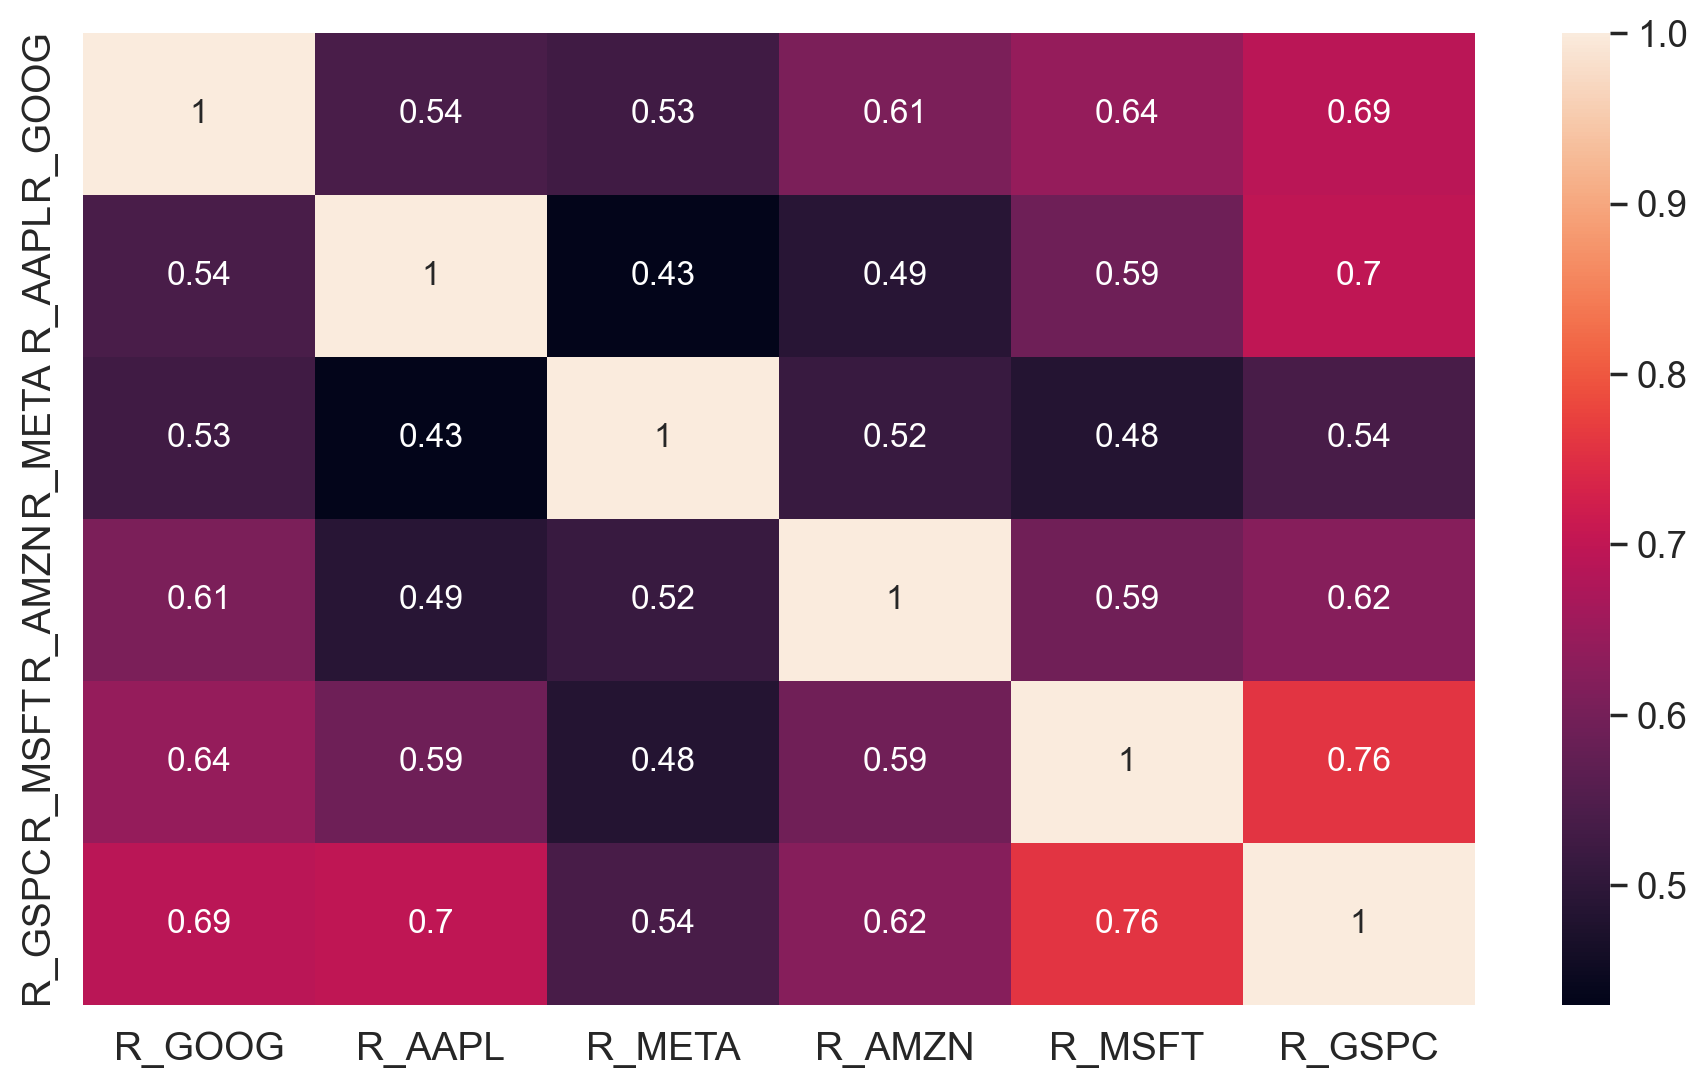

In [101]:
corr = dataset[['R_GOOG','R_AAPL','R_META','R_AMZN','R_MSFT', 'R_GSPC']].corr()
sns.heatmap(corr,xticklabels=corr.columns.values,yticklabels=corr.columns.values,annot=True,annot_kws={'size':12})
heat_map=plt.gcf()
heat_map.set_size_inches(10,6)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt. show()

In [102]:
# annual volatility = daily volatility * sqrt(252) = returns * sqrt(252)
#252 = trading days in a year

In [103]:
returns  = dataset[['R_GOOG','R_AAPL','R_META','R_AMZN','R_MSFT', 'R_GSPC']]
n_days = 252
for col in returns.columns:
    print("The volatility of the stock of", col, "=",round(returns[col].std()*np.sqrt(n_days)*100,2), '% per year')

The volatility of the stock of R_GOOG = 27.56 % per year
The volatility of the stock of R_AAPL = 28.33 % per year
The volatility of the stock of R_META = 39.69 % per year
The volatility of the stock of R_AMZN = 32.21 % per year
The volatility of the stock of R_MSFT = 25.98 % per year
The volatility of the stock of R_GSPC = 16.89 % per year


In [104]:
# Monthly volatility = daily volatility * sqrt(21) = returns * sqrt(21)
# 21 = trading days in a month

In [105]:
returns  = dataset[['R_GOOG','R_AAPL','R_META','R_AMZN','R_MSFT', 'R_GSPC']]
n_days = 21
for col in returns.columns:
    print("The volatility of the stock of", col, "=",round(returns[col].std()*np.sqrt(n_days)*100,2), '% per month')

The volatility of the stock of R_GOOG = 7.96 % per month
The volatility of the stock of R_AAPL = 8.18 % per month
The volatility of the stock of R_META = 11.46 % per month
The volatility of the stock of R_AMZN = 9.3 % per month
The volatility of the stock of R_MSFT = 7.5 % per month
The volatility of the stock of R_GSPC = 4.88 % per month


In [106]:
# shape ratio measures the risk adjusted returns for companies 
# shape ratio = Rp-Rf/Standard Deviation portfolio's excess return
# Rp - return of portfolio
# Rf - Risk Free rate

In [107]:
n_days = 252
def sharpe_ratio (serie, rf = 0.025):
    ''''
    serie : Series of daily returns of the stock or portfolio
    rf: annual return on a risk-free investment (default rf=0.025)
    '''''
    # Mean Annualized Return
    rp = serie.mean()*n_days
    # Annual volatility
    volatility = serie.std()*np.sqrt(n_days)
    # Sharpe ratio
    sharpe = (rp -rf  ) / volatility
    return sharpe

In [108]:
# Let's consider a risk-free investment with an annual return of 2.5% and
#we calculate the Sharpe Ratio of each stock
for col in returns.columns:
    print("The Sharpe ratio of,", col,"=", round(sharpe_ratio(returns[col]),2 ))

The Sharpe ratio of, R_GOOG = 0.87
The Sharpe ratio of, R_AAPL = 0.78
The Sharpe ratio of, R_META = 0.66
The Sharpe ratio of, R_AMZN = 0.8
The Sharpe ratio of, R_MSFT = 0.89
The Sharpe ratio of, R_GSPC = 0.67


In [109]:
# Beta of Security - how the given security performs in comparision to market 
#β=0  No relation to the market (i.e S\&P500).

#β=1 Performs same as the market.
#β<1 Lose less in recession and makes less in flourishing economy.
#β>1 Lose more in recession and makes more in flourinshing economy.
# β< 0 Negatively related to market. That is, if market goes up, security (used interchangeably with stock) goes down and vice versa. Eg. GOLD, SILVER, precious metal etc.

In [110]:
# β = cov(stock , S&P)/var(S&P)

In [111]:
cov = returns.cov() * 12 # annualized
cov

R_GOOG    R_AAPL    R_META    R_AMZN    R_MSFT    R_GSPC
R_GOOG  0.003618  0.002005  0.002738  0.002573  0.002189  0.001535
R_AAPL  0.002005  0.003821  0.002300  0.002132  0.002074  0.001593
R_META  0.002738  0.002300  0.007501  0.003143  0.002378  0.001713
R_AMZN  0.002573  0.002132  0.003143  0.004939  0.002365  0.001610
R_MSFT  0.002189  0.002074  0.002378  0.002365  0.003214  0.001586
R_GSPC  0.001535  0.001593  0.001713  0.001610  0.001586  0.001359

In [112]:
beta_GOOG = cov.iloc[0,5] / cov.iloc[5,5]
print(f'Beta (10Y period) of Google is : {beta_GOOG}')
beta_AAPL = cov.iloc[1,5] / cov.iloc[5,5]
print(f'Beta (10Y period) of Apple is : {beta_AAPL}')
beta_META = cov.iloc[2,5] / cov.iloc[5,5]
print(f'Beta (10Y period) of Facebook is : {beta_META}')
beta_AMZN = cov.iloc[3,5] / cov.iloc[5,5]
print(f'Beta (10Y period) of Amazon is : {beta_AMZN}')
beta_MSFT = cov.iloc[4,5] / cov.iloc[5,5]
print(f'Beta (10Y period) of Microsoft is : {beta_MSFT}')
beta_GSPC = cov.iloc[5,5] / cov.iloc[5,5]
print(f'Beta (10Y period) of S&P 500 is : {beta_GSPC}')

Beta (10Y period) of Google is : 1.129692010467134
Beta (10Y period) of Apple is : 1.1721600511297032
Beta (10Y period) of Facebook is : 1.2610183383343174
Beta (10Y period) of Amazon is : 1.1850395776955231
Beta (10Y period) of Microsoft is : 1.1671358202511475
Beta (10Y period) of S&P 500 is : 1.0


In [113]:
# portfolio simultaion - generate 2673 portfolios by adjusting the asset allocation. The simulation considers historical returns, volatilities, and correlations to construct efficient portfolios. With a risk-free rate of 0%, we will evaluate the portfolios' performance relative to a risk-free investment. The analysis aims to understand diversification benefits and risk reduction, providing insights for constructing well-diversified portfolios aligned with investors' risk tolerance and return objectives.

In [114]:
from scipy.optimize import minimize


In [115]:
# Portfolio Simulation
portfolio        = 2673  # generation of a portfolio
n_assets         = returns.shape[1]
weights          = np.random.dirichlet(np.full(n_assets,0.05),portfolio)
mean_returns     = returns.mean()
sigma            = returns.cov()
expected_returns = np.zeros(portfolio)
expected_vol     = np.zeros(portfolio)
sharpe_ratio     = np.zeros(portfolio)
rf_rate          = 0.0                          # risk free rate

for i in range(portfolio):
    w                   = weights[i,:]
    expected_returns[i] = np.sum(mean_returns @ w)*252
    expected_vol[i]     = np.sqrt(np.dot(w.T,sigma @ w))*np.sqrt(252)
    sharpe_ratio[i]     = (expected_returns[i]-rf_rate)/expected_vol[i]

In [116]:
def portfolio_volatility(weight):
    return np.sqrt(np.dot(weight.T,
                          np.dot(sigma,weight)))*np.sqrt(252)

def portfolio_return(weight):

    return np.sum(mean_returns*weight)*252

def portfolio_performance(weight):
    return_p = portfolio_return(weight)
    vol_p    = portfolio_volatility(weight)
    return return_p, vol_p

In [117]:
def negativeSR(weight):
    return_p, vol_p = portfolio_performance(weight)
    rf_rate         = 0.025
    return -(return_p - rf_rate)/vol_p

def max_sharpe_ratio():

    def sum_one(weight):
        w= weight
        return np.sum(weight)-1

    n_assets           = returns.shape[1]
    weight_constraints = ({'type':'eq','fun': sum_one})
    w0                 = np.random.dirichlet(np.full(n_assets,0.05)).tolist()    # w0 is an initila guess

    return minimize(negativeSR,w0,method='SLSQP',
                          bounds  =((0,1),)*n_assets,
                      constraints = weight_constraints)

In [118]:
def min_vol():

    n_assets           = returns.shape[1]
    weight_constraints = ({'type':'eq','fun': lambda x: np.sum(x)-1})
    w0                 = np.random.dirichlet(np.full(n_assets,0.05)).tolist()
    bounds             = ((0,1),)*n_assets

    return minimize(portfolio_volatility,w0,method='SLSQP',
                   bounds      = bounds,
                   constraints = weight_constraints)

In [119]:
def efficient_portfolio_target(target):

    constraints = ({'type':'eq','fun': lambda x: portfolio_return(x)- target},
                  {'type' :'eq','fun': lambda x: np.sum(x)-1})
    w0          = np.random.dirichlet(np.full(n_assets,0.05)).tolist()
    bounds      = ((0,1),)*n_assets

    return minimize(portfolio_volatility,w0, method = 'SLSQP',
                    bounds      = bounds,
                    constraints = constraints)

In [120]:
def efficient_frontier(return_range):
    return [efficient_portfolio_target(ret) for ret in return_range]

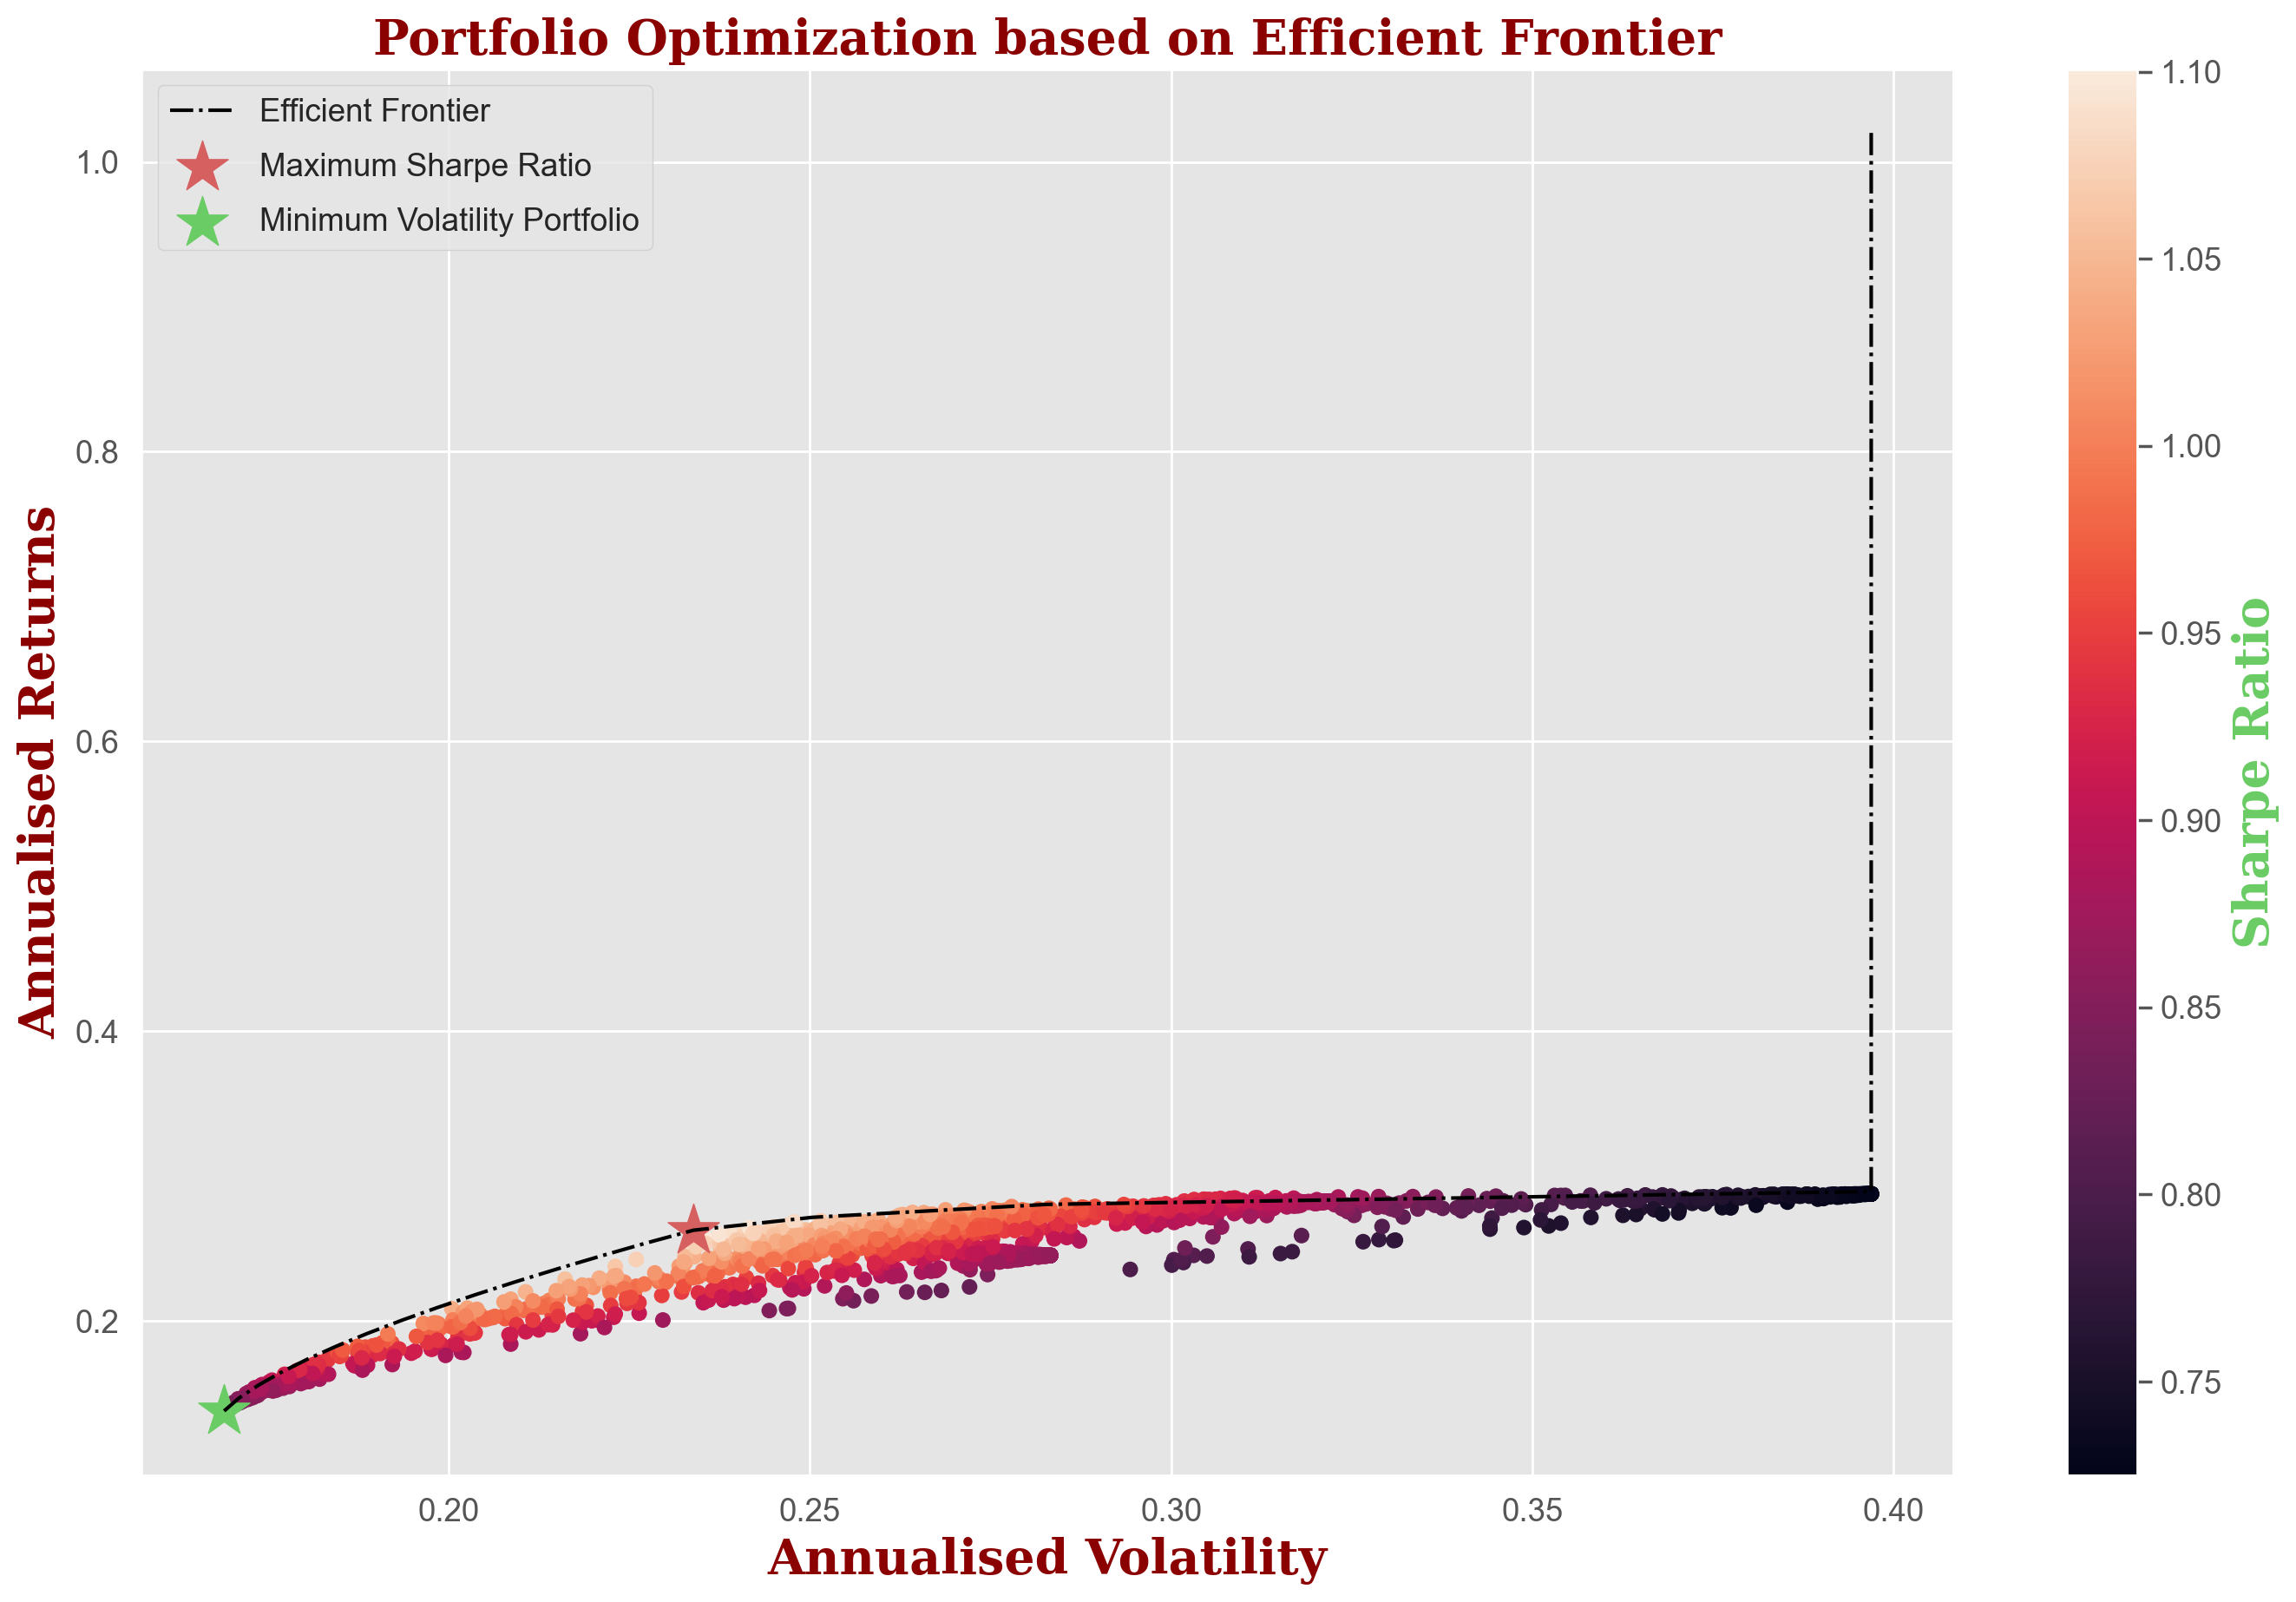

In [121]:
sharpe_maximum      = max_sharpe_ratio()
return_p,vol_p      = portfolio_performance(sharpe_maximum['x'])
min_volatility      = min_vol()
return_min,vol_min  = portfolio_performance(min_volatility['x'])


plt.figure(figsize =(15,10))
plt.style.use('ggplot')
plt.scatter(expected_vol,expected_returns, c = sharpe_ratio)
# plt.colorbar.sel(label = 'Sharpe Ratio',size=20)
plt.colorbar().set_label('Sharpe Ratio', size= 20, color = 'g', family='serif',weight='bold')
target               = np.linspace(return_min,1.02,100)
efficient_portfolios = efficient_frontier(target)
plt.plot([i.fun for i in efficient_portfolios], target, linestyle ='dashdot', color ='black',
         label='Efficient Frontier')
plt.scatter(vol_p,return_p, c = 'r', marker='*', s = 500, label = 'Maximum Sharpe Ratio')
plt.scatter(vol_min,return_min, c = 'g',  marker ='*', s = 500, label='Minimum Volatility Portfolio')

font1 = {'family':'serif','color':'darkred','size':20,'weight':'bold'}
font2 = {'family':'serif','color':'darkred','size':20,'weight':'bold'}
plt.title('Portfolio Optimization based on Efficient Frontier',fontdict=font1)
plt.xlabel('Annualised Volatility',fontdict=font2)
plt.ylabel('Annualised Returns',fontdict=font2)
plt.legend(labelspacing=0.8)

In [122]:
#  simulating a random portfolio using a Dirichlet distribution with weight limits. So we will try to generate 10,000 portfolios with a risk-free rate of 2.5% . To do this, we need to compute performance measures for each portfolio, such as the weighted average return during the year and the standard deviation and Sharpe ratio of each portfolio.

In [123]:
def calc_portfolio_perf(weights, mean_returns, cov, rf):# portfolio performance, calculate the annualised return, sharpe ratio
    portfolio_return = np.sum(mean_returns*weights)*252 #252 working days at the stock exchange
    portfolio_std = np.sqrt(np.dot(weights.T,np.dot(cov,weights)))*np.sqrt(252) # np.dot multiplication of matrices
    sharpe_ratio = (portfolio_return - rf) / portfolio_std
    return portfolio_return, portfolio_std, sharpe_ratio

def simulate_random_portfolios(num_portfolios, mean_returns, cov, rf): # random simulation
    results_matrix = np.zeros((len(mean_returns)+3, num_portfolios))
    for i in range(num_portfolios):
        weights=np.random.random(len(mean_returns))
        weights /= np.sum(weights)
        portfolio_return, portfolio_std, sharpe_ratio = calc_portfolio_perf(weights, mean_returns, cov, rf)
        results_matrix[0,i] = portfolio_return
        results_matrix[1,i] = portfolio_std
        results_matrix[2,i] = sharpe_ratio
        #iterate through the weight vector and add data to results array
        for j in range(len(weights)):
            results_matrix[j+3,i] = weights[j]
    results_df = pd.DataFrame(results_matrix.T,columns=['ret','stdev','sharpe'] + [ticker for ticker in tickers])
    return results_df

In [124]:
tickers = []
for i in dataset[['GOOG','AAPL','META','AMZN','MSFT', 'GSPC']].columns:
    tickers.append(i)

In [125]:
mean_returns = dataset[['GOOG','AAPL','META','AMZN','MSFT', 'GSPC']].pct_change().mean()
cov = dataset[['GOOG','AAPL','META','AMZN','MSFT', 'GSPC']].pct_change().cov()
num_portfolios = 10000
rf = 0.025
results_frame =simulate_random_portfolios(num_portfolios, mean_returns,cov, rf) #random selection/creation of the portfolio

In [126]:
results_frame.sum(axis=1)-results_frame["ret"]-results_frame["stdev"]-results_frame["sharpe"];

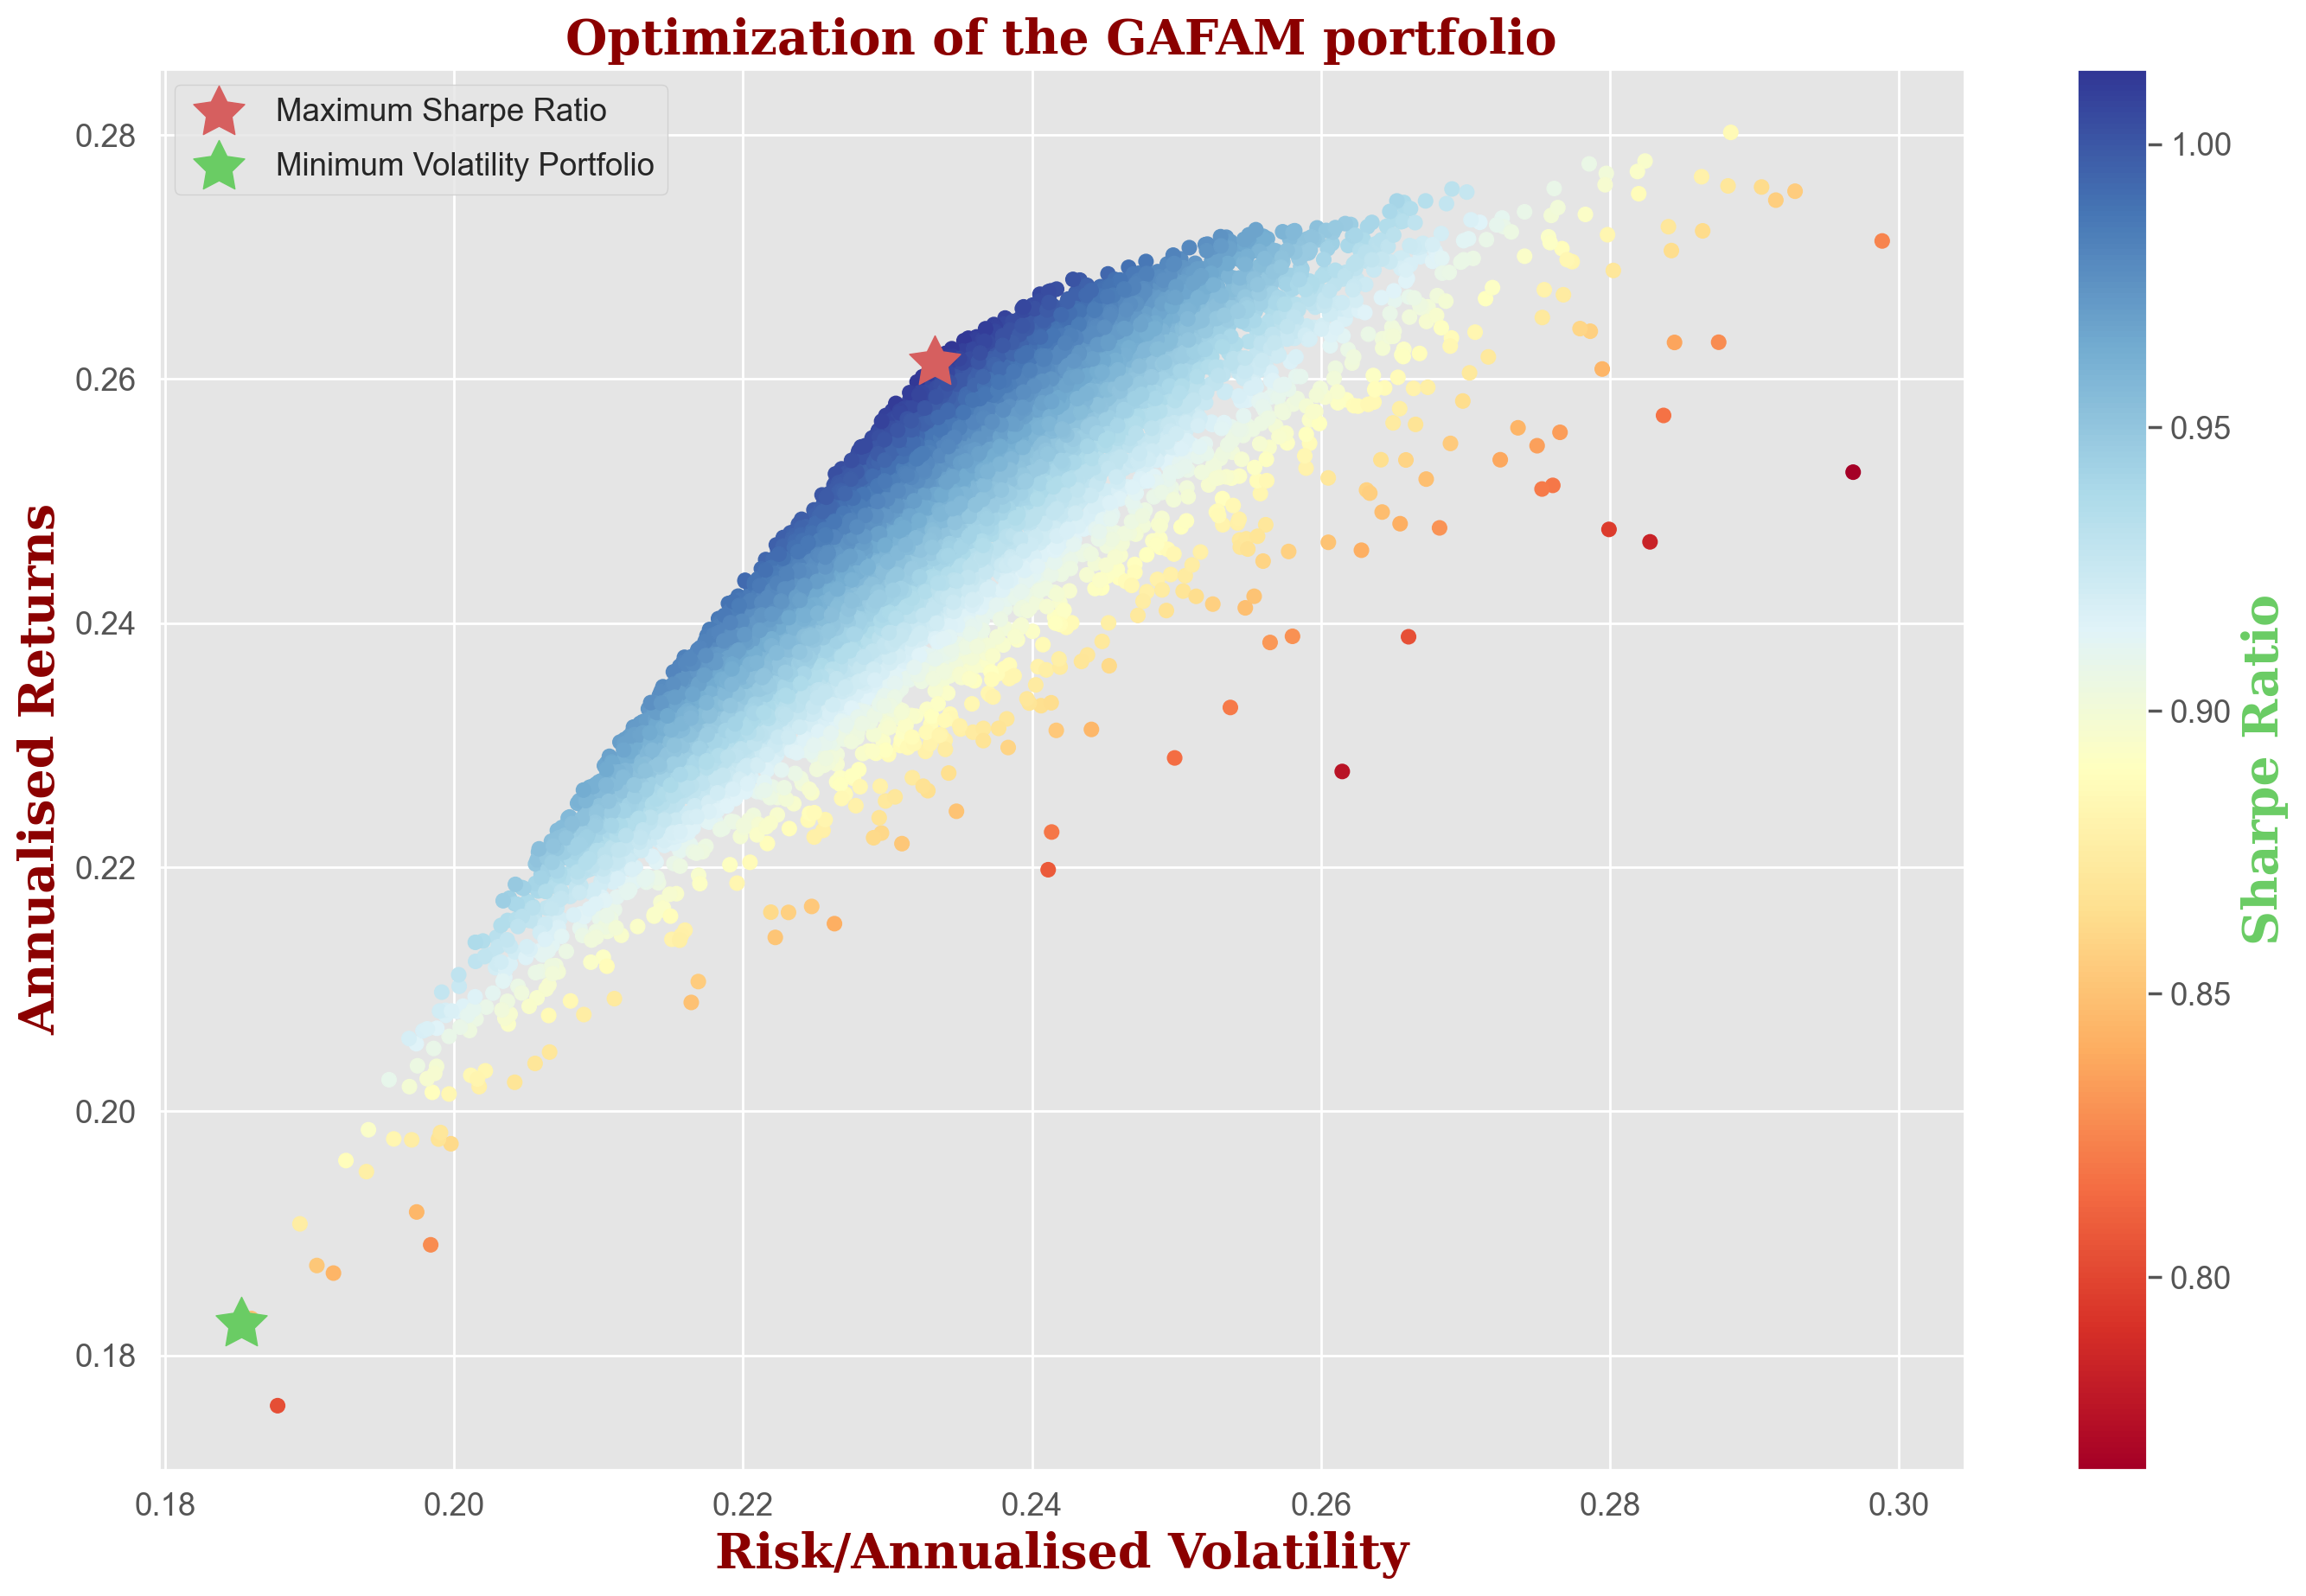

In [127]:
#Locate position of portfolio with highest Sharpe Ratio
max_sharpe_port=results_frame.iloc[results_frame["sharpe"].idxmax()] # max sharp ratio rouge
#locate positon of portfolio with minimum standard deviation
min_vol_port = results_frame.iloc[results_frame["stdev"].idxmin()] # min volatility = min variance portfolio vert
#create scatter plot coloured by Sharpe Ratio
plt.subplots(figsize=(15,10)) # Number of rows/colums of the subplot grid
plt.scatter(results_frame.stdev,results_frame.ret,c=results_frame.sharpe,cmap='RdYlBu') #Colormaps in Matplotlib
plt.title('Optimization of the GAFAM portfolio',fontdict=font1)
plt.xlabel('Risk/Annualised Volatility',fontdict=font2)
plt.ylabel('Annualised Returns',fontdict=font2)
#plt.colorbar () # match the colorbar
plt.colorbar().set_label('Sharpe Ratio', size= 20, color = 'g', family='serif',weight='bold')
target               = np.linspace(return_min,1.02,100)
#plot red star to highlight position of portfolio with highest Sharpe Ratio
plt.scatter(max_sharpe_port[1],max_sharpe_port[0],marker=(5,1,0),color='r',s=500, label = 'Maximum Sharpe Ratio')
#plot green star to highlight position of minimum vartance portfolio
plt.scatter(min_vol_port[1] ,min_vol_port[0],marker=(5,1,0),color='g', s=500, label='Minimum Volatility Portfolio')
plt.legend(labelspacing=0.8)
plt.savefig('Portfolio_Optimization_Efficient_Frontier.pdf')
plt.show()

In [128]:
max_sharpe_port.to_frame().T # portfolio with the highest Sharpe ratio. it is negative when the investment return is Lower than


ret     stdev   sharpe      GOOG      AAPL      META      AMZN  \
325  0.261368  0.233259  1.01333  0.280762  0.216863  0.050579  0.179701   

         MSFT      GSPC  
325  0.259841  0.012253

In [129]:
min_vol_port.to_frame().T #portfolio with the Lowest variance portfolio


ret     stdev    sharpe      GOOG     AAPL      META      AMZN  \
2695  0.182593  0.185264  0.850639  0.129409  0.07794  0.052775  0.016958   

          MSFT      GSPC  
2695  0.079501  0.643417

In [130]:
# ==============================
# COMMON BASE FOR ALL MODELS
# ==============================

import numpy as np
import pandas as pd

# Daily returns
returns = dataset.pct_change().dropna()

# Annualized mean returns
mean_returns = returns.mean() * 252

# Annualized covariance
cov_matrix = returns.cov() * 252

print("Returns shape:", returns.shape)
print("Covariance matrix shape:", cov_matrix.shape)


Returns shape: (3428, 12)
Covariance matrix shape: (12, 12)


In [133]:
!pip install PyPortfolioOpt


  Using cached pyportfolioopt-1.5.6-py3-none-any.whl.metadata (22 kB)
  Using cached cvxpy-1.7.5-cp312-cp312-win_amd64.whl.metadata (9.7 kB)
  Using cached ecos-2.0.14-cp312-cp312-win_amd64.whl.metadata (8.2 kB)
  Using cached osqp-1.0.5-cp312-cp312-win_amd64.whl.metadata (2.1 kB)
  Using cached clarabel-0.11.1-cp39-abi3-win_amd64.whl.metadata (4.9 kB)
Using cached pyportfolioopt-1.5.6-py3-none-any.whl (62 kB)
Using cached ecos-2.0.14-cp312-cp312-win_amd64.whl (72 kB)
Using cached cvxpy-1.7.5-cp312-cp312-win_amd64.whl (1.2 MB)
Using cached clarabel-0.11.1-cp39-abi3-win_amd64.whl (887 kB)
Using cached osqp-1.0.5-cp312-cp312-win_amd64.whl (310 kB)

   ---------------------------------------- 0/5 [osqp]
   ---------------------------------------- 0/5 [osqp]
   ---------------------------------------- 0/5 [osqp]
   ---------------- ----------------------- 2/5 [clarabel]
   ------------------------ --------------- 3/5 [cvxpy]
   ------------------------ --------------- 3/5 [cvxpy]
   ------


[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip
